<a id='top'></a>

## User Overview Analysis of Tellco Telecommunications

#### Tables of Content

<html>
    <ul>
        <li><a href='#intro'>Introduction</a></li>
        <li><a href='#obj'>Objective</a></li>
        <li><a href= '#research'/>Research Questions<a/></li>
              <br/>
            <ul>
             <li><a href='#fe'>Feature Selection</a></li>
             </ul>
            <ol>
            <li><a href='#r1'>Research Question 1</a></li>
             <li><a href='#r2'>Research Question 2</a></li>
             <li><a href='#r3'>Research Question 3</a></li>
            </ol>
        <br/>
        <li><a href= '#ana'>Analysis<a/></li>
        <li><a href= '#go'>General Observation<a/></li>
        <li><a href= '#rc'>Recommendation & Conclusions<a/></li>
        <li><a href= '#lim'>Limitations<a/></li>
        <li><a href= '#ref'>Referecnes<a/></li>
    </ul>
</html>

<a id='intro'></a>
#### Introduction


The life blood of any business is it scustomers. 

Businesses are always finding ways to better understand their customers so that they can provide more efficient and tailored solutionsm to them.

Exploratory Data Analysis is a fundamental step in the datascience process. 

It involves all the processes used to familiarize oneself with the data and explore initial insights that will inform further steps in the data science process.


<a id='obj'></a>
#### Objective

> The Objective of this part of the analysis on Tellco is to undertsnad the customer demography 

> And consumer behaviour across various levels of product usage and interaction

<a id='research'></a>

#### Research Questions

 - Research Question 1
 
     - Top performers
 
          - Who/What are the top tiers accros manufacturers, handsets and customers
          
          - What group of users belong each to the top 5 decile classes based on the total duration for all sessions
          
   
  
 -  Research Question 2
 
       - User Behaviour in xDR sessions
 
         - What inisghts can be gooten from user behaviour accross the xDR sessions (Data Channel)
  
  
 -  Research Question 3
 
      - Siginificant Relationships 
 
          - Are  there an existing significant relationship across
          
              1. each application & the total DL+UL data
          
              2. the various xDR sessions (Google,Youtbe,Netflix, etc.)
              
              
              
        
 
     


import libraries

In [856]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#### Load data into workspace

In [857]:
path = '../datasets/cleaned/cleanWk2_data.csv'
data = pd.read_csv(path)

In [858]:
data

,bearer_id,start,start_ms,end,end_ms,imsi,msisdn_number,imei,last_location_name,avg_rtt_dl__ms_,...,youtube_dl__bytes_,youtube_ul__bytes_,netflix_dl__bytes_,netflix_ul__bytes_,gaming_dl__bytes_,gaming_ul__bytes_,other_dl__bytes_,other_ul__bytes_,total_ul__bytes_,total_dl__bytes_
0,13114483460844900352,2019-04-04 12:01:18,770.0000,2019-04-25 14:35:31,662.00000,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,42.000000,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,3.674974e+07,3.088796e+08
1,13114483482878900224,2019-04-09 13:04:04,235.0000,2019-04-25 08:15:48,606.00000,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.000000,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,5.380039e+07,6.533850e+08
2,13114483484080500736,2019-04-09 17:42:11,1.0000,2019-04-25 11:58:13,652.00000,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,46.991676,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,2.788364e+07,2.798073e+08
3,13114483485442799616,2019-04-10 00:31:25,486.0000,2019-04-25 07:36:35,171.00000,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,46.991676,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,4.332422e+07,8.460285e+08
4,13114483499480700928,2019-04-12 20:10:23,565.0000,2019-04-25 10:40:32,954.00000,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,46.991676,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,3.854281e+07,5.691386e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,2019-04-29 07:28:42,451.0000,2019-04-30 06:02:33,214.00000,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,32.000000,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,5.762885e+07,5.741753e+08
149997,7349883264234609664,2019-04-29 07:28:42,483.0000,2019-04-30 10:41:33,187.00000,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,27.000000,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,3.913508e+07,6.666488e+08
149998,13114483573367300096,2019-04-29 07:28:43,283.0000,2019-04-30 10:46:12,810.00000,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,43.000000,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,3.491222e+07,5.927864e+08
149999,13114483573367300096,2019-04-29 07:28:43,696.0000,2019-04-30 10:40:34,327.00000,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,37.000000,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,2.962610e+07,3.718959e+08


In [859]:
data.columns

Index(['bearer_id', 'start', 'start_ms', 'end', 'end_ms', 'imsi',
       'msisdn_number', 'imei', 'last_location_name', 'avg_rtt_dl__ms_',
       'avg_rtt_ul__ms_', 'avg_bearer_tp_dl__kbps_', 'avg_bearer_tp_ul__kbps_',
       'tcp_dl_retrans__vol__bytes_', 'tcp_ul_retrans__vol__bytes_',
       'dl_tp_<_50_kbps__%_', '50_kbps_<_dl_tp_<_250_kbps__%_',
       '250_kbps_<_dl_tp_<_1_mbps__%_', 'dl_tp_>_1_mbps__%_',
       'ul_tp_<_10_kbps__%_', '10_kbps_<_ul_tp_<_50_kbps__%_',
       '50_kbps_<_ul_tp_<_300_kbps__%_', 'ul_tp_>_300_kbps__%_',
       'http_dl__bytes_', 'http_ul__bytes_', 'activity_duration_dl__ms_',
       'activity_duration_ul__ms_', 'dur___ms__1', 'handset_manufacturer',
       'handset_type', 'nb_of_sec_with_125000b_<_vol_dl',
       'nb_of_sec_with_1250b_<_vol_ul_<_6250b',
       'nb_of_sec_with_31250b_<_vol_dl_<_125000b',
       'nb_of_sec_with_37500b_<_vol_ul',
       'nb_of_sec_with_6250b_<_vol_dl_<_31250b',
       'nb_of_sec_with_6250b_<_vol_ul_<_37500b',
       'nb_of

<a id='fe'></a>

#### Feature Selection
 - For this analyis, we would be working with the following features

In [860]:
columns = ['bearer_id', 'msisdn_number','dur___ms__1','http_dl__bytes_',
           'http_ul__bytes_', 'activity_duration_dl__ms_',
           'activity_duration_ul__ms_',
           'handset_manufacturer', 'handset_type',
          'social_media_dl__bytes_', 'social_media_ul__bytes_',
       'google_dl__bytes_', 'google_ul__bytes_', 'email_dl__bytes_',
       'email_ul__bytes_', 'youtube_dl__bytes_', 'youtube_ul__bytes_',
       'netflix_dl__bytes_', 'netflix_ul__bytes_', 'gaming_dl__bytes_',
       'gaming_ul__bytes_', 'other_dl__bytes_', 'other_ul__bytes_',
       'total_ul__bytes_', 'total_dl__bytes_']

In [861]:
data2 = data[columns]

In [862]:
data2

,bearer_id,msisdn_number,dur___ms__1,http_dl__bytes_,http_ul__bytes_,activity_duration_dl__ms_,activity_duration_ul__ms_,handset_manufacturer,handset_type,social_media_dl__bytes_,...,youtube_dl__bytes_,youtube_ul__bytes_,netflix_dl__bytes_,netflix_ul__bytes_,gaming_dl__bytes_,gaming_ul__bytes_,other_dl__bytes_,other_ul__bytes_,total_ul__bytes_,total_dl__bytes_
0,13114483460844900352,3.366496e+10,8.639998e+07,5.477641e+06,471589.06209,37624.00000,38787.000000,samsung,samsung galaxy a5 sm-a520f,1.545765e+06,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,3.674974e+07,3.088796e+08
1,13114483482878900224,3.368185e+10,8.639998e+07,5.477641e+06,471589.06209,168.00000,3560.000000,samsung,samsung galaxy j5 (sm-j530),1.926113e+06,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,5.380039e+07,6.533850e+08
2,13114483484080500736,3.376063e+10,8.639998e+07,5.477641e+06,471589.06209,0.00000,0.000000,samsung,samsung galaxy a8 (2018),1.684053e+06,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,2.788364e+07,2.798073e+08
3,13114483485442799616,3.375034e+10,8.639998e+07,5.477641e+06,471589.06209,3330.00000,37882.000000,undefined,undefined,6.441210e+05,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,4.332422e+07,8.460285e+08
4,13114483499480700928,3.369980e+10,8.639998e+07,5.477641e+06,471589.06209,0.00000,0.000000,samsung,samsung sm-g390f,8.626000e+05,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,3.854281e+07,5.691386e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,3.365069e+10,8.123076e+07,5.477641e+06,471589.06209,42376.00000,41915.000000,apple,apple iphone 8 plus (a1897),3.464974e+06,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,5.762885e+07,5.741753e+08
149997,7349883264234609664,3.366345e+10,9.797070e+07,5.477641e+06,471589.06209,17264.00000,16759.000000,apple,apple iphone se (a1723),2.344568e+06,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,3.913508e+07,6.666488e+08
149998,13114483573367300096,3.362189e+10,9.824953e+07,5.477641e+06,471589.06209,25003.00000,28640.000000,apple,apple iphone xs (a2097),1.245845e+06,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,3.491222e+07,5.927864e+08
149999,13114483573367300096,3.361962e+10,9.791063e+07,5.477641e+06,471589.06209,13405.00000,34088.000000,huawei,huawei fig-lx1,8.015470e+05,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,2.962610e+07,3.718959e+08


In [863]:
data2.columns

Index(['bearer_id', 'msisdn_number', 'dur___ms__1', 'http_dl__bytes_',
       'http_ul__bytes_', 'activity_duration_dl__ms_',
       'activity_duration_ul__ms_', 'handset_manufacturer', 'handset_type',
       'social_media_dl__bytes_', 'social_media_ul__bytes_',
       'google_dl__bytes_', 'google_ul__bytes_', 'email_dl__bytes_',
       'email_ul__bytes_', 'youtube_dl__bytes_', 'youtube_ul__bytes_',
       'netflix_dl__bytes_', 'netflix_ul__bytes_', 'gaming_dl__bytes_',
       'gaming_ul__bytes_', 'other_dl__bytes_', 'other_ul__bytes_',
       'total_ul__bytes_', 'total_dl__bytes_'],
      dtype='object')

<a id='r1'></a>

#### Research Question 1

  - Top performers
 
       - Who/What are the top tiers accros manufacturers, handsets and customers
          
       - What group of users belong each to the top 5 decile classes based on the total duration for all sessions

#### Who/What are the top tiers accros manufacturers, handsets and customers
 

 ##### A
 
 In answering these, we would focus on identifying the following:

- top 10 handsets used by the customers.

- top 3 handset manufacturers

- top 5 handsets per handset manufacturer

> top 10 handsets used by the customers

In [864]:
top10_handests = data2.groupby('handset_type')['msisdn_number'].count().reset_index(name="customer_count").sort_values('customer_count', ascending=False).head(10)

In [865]:
top10_handests

,handset_type,customer_count
316,huawei b528s-23a,20324
53,apple iphone 6s (a1688),9419
49,apple iphone 6 (a1586),9023
1247,undefined,8987
59,apple iphone 7 (a1778),6326
73,apple iphone se (a1723),5187
66,apple iphone 8 (a1905),4993
78,apple iphone xr (a2105),4568
955,samsung galaxy s8 (sm-g950f),4520
75,apple iphone x (a1901),3813


In [866]:
top10_handests.rename(columns={'handset_type': 'Handset_Type', 'customer_Count':'Customer_Count'}, inplace=True)

In [867]:
top10_handests

,Handset_Type,customer_count
316,huawei b528s-23a,20324
53,apple iphone 6s (a1688),9419
49,apple iphone 6 (a1586),9023
1247,undefined,8987
59,apple iphone 7 (a1778),6326
73,apple iphone se (a1723),5187
66,apple iphone 8 (a1905),4993
78,apple iphone xr (a2105),4568
955,samsung galaxy s8 (sm-g950f),4520
75,apple iphone x (a1901),3813


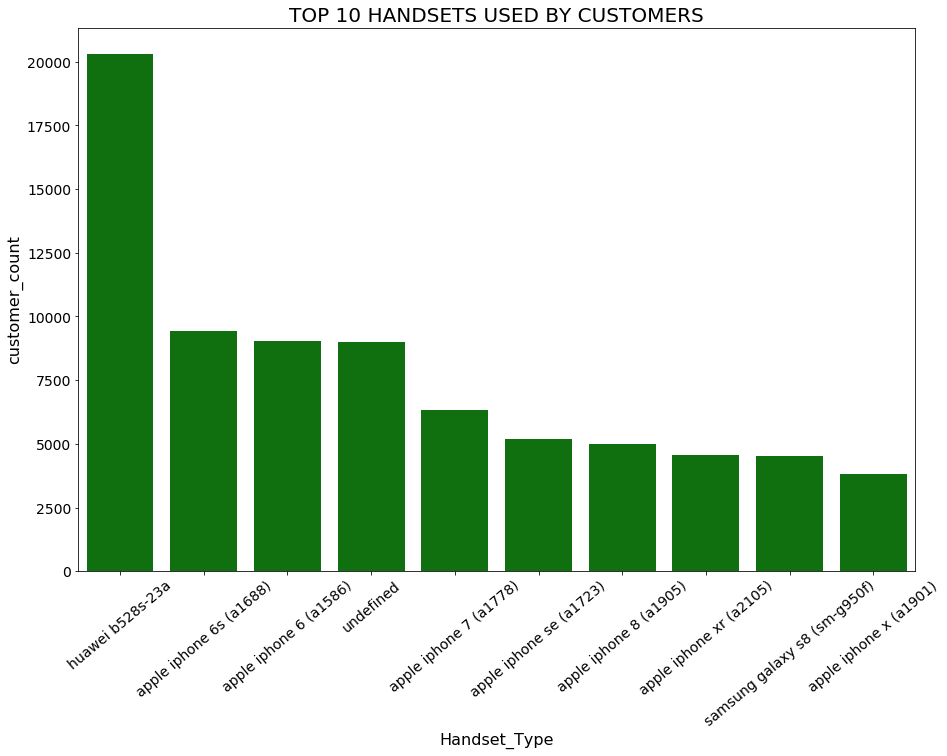

In [868]:
plt.subplots(figsize=(15,10))
plt.xticks(rotation=40, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Handset_Type', fontsize=16)
plt.ylabel('customer_count', fontsize=16)
plt.title('TOP 10 HANDSETS USED BY CUSTOMERS', fontsize=20)
sns.barplot(x='Handset_Type', y= 'customer_count', data=top10_handests, color='g')
# save chart
plt.savefig(fname='visuals/top10Hansets.png', format='png')
plt.show()

- Observation

> From the above we can deduce the folowing:

    1. Smart Phones are the most popularly used phones 
    
    2. Huawei phone specifically brand (_Huawei B528S-23A_) have the largest sngle purchase
    
    3. Apple phone brands is the most popular (and possibly have the highest market share)

> top 3 handset manufacturers

In [869]:
top3_man = data2.groupby('handset_manufacturer')['msisdn_number'].count().reset_index().sort_values('msisdn_number', ascending=False).head(3)

In [870]:
top3_man.rename(columns={'handset_manufacturer': 'Manufacturer', 'msisdn_number':'Customer_Count'}, inplace=True)

In [871]:
top3_man

,Manufacturer,Customer_Count
4,apple,60137
93,samsung,40839
46,huawei,34423


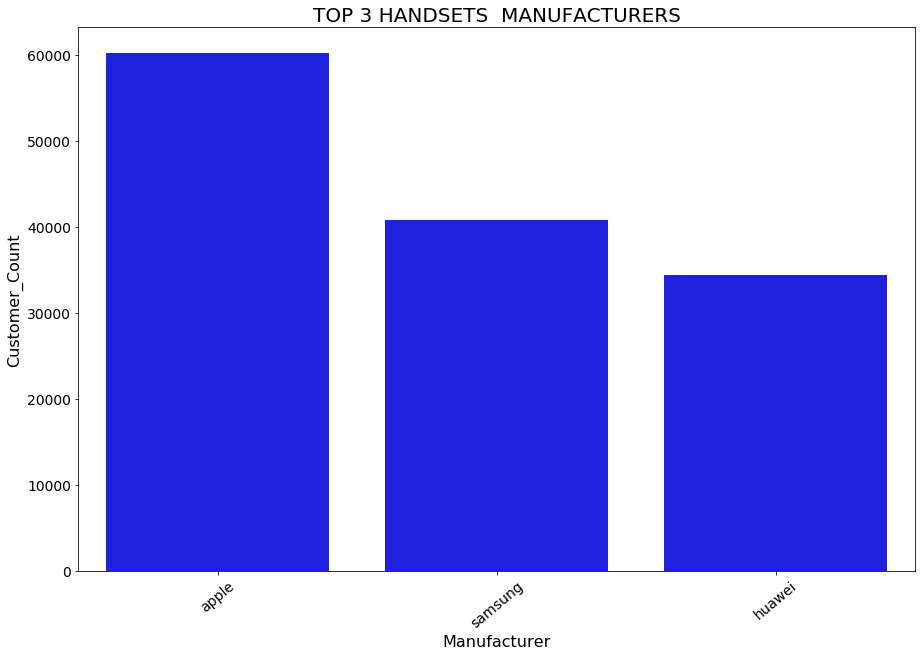

In [872]:
plt.subplots(figsize=(15,10))
plt.xticks(rotation=40, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Manufacturer', fontsize=16)
plt.ylabel('Cust', fontsize=16)
plt.title('TOP 3 HANDSETS  MANUFACTURERS', fontsize=20)
sns.barplot(x='Manufacturer', y= 'Customer_Count', data=top3_man, color='b')
plt.savefig(fname='visuals/top3Man.png', format='png')
plt.show()

- Observation

> From the above we can deduce the folowing:

   1. Apple Manufacturer have the highest purchse among the customers .
   
       This is also indicative that most cutomers are i-phone subscribers

> top 5 handsets per handset manufacturer

In [873]:
top5Hands_man = data2.groupby(['handset_manufacturer','handset_type'])['handset_type'].count()

In [874]:
top5Hands_man

handset_manufacturer                     handset_type                                                                       
a-link telecom international co limited  a-link telecom i. cubot a5                                                             1
                                         a-link telecom i. cubot note plus                                                      1
                                         a-link telecom i. cubot note s                                                         1
                                         a-link telecom i. cubot nova                                                           1
                                         a-link telecom i. cubot power                                                          1
                                                                                                                               ..
zte                                      zte starxtrem by sfr                                  

In [875]:
top5Hands_man=top5Hands_man.reset_index(name='count')

In [876]:
top5Hands_man

,handset_manufacturer,handset_type,count
0,a-link telecom international co limited,a-link telecom i. cubot a5,1
1,a-link telecom international co limited,a-link telecom i. cubot note plus,1
2,a-link telecom international co limited,a-link telecom i. cubot note s,1
3,a-link telecom international co limited,a-link telecom i. cubot nova,1
4,a-link telecom international co limited,a-link telecom i. cubot power,1
...,...,...,...
1392,zte,zte starxtrem by sfr,1
1393,zte,zte zte blade c2 smartphone android by sfr sta...,2
1394,zyxel communications corp,zyxel communicat. lte7460,1
1395,zyxel communications corp,zyxel communicat. sbg3600,1


In [877]:
top5Hands_man = top5Hands_man.sort_values(['handset_manufacturer', 'count'], ascending=False)

In [878]:
top5Hands_man=top5Hands_man.groupby('handset_manufacturer').head(5)

In [879]:
top5Hands_man

,handset_manufacturer,handset_type,count
1394,zyxel communications corp,zyxel communicat. lte7460,1
1395,zyxel communications corp,zyxel communicat. sbg3600,1
1396,zyxel communications corp,zyxel communicat. zyxel wah7706,1
1389,zte,zte mf259,170
1391,zte,zte racer iii mini zte switch x1 bouygues tele...,5
...,...,...,...
6,a-link telecom international co limited,a-link telecom i. cubot x18 plus,2
0,a-link telecom international co limited,a-link telecom i. cubot a5,1
1,a-link telecom international co limited,a-link telecom i. cubot note plus,1
2,a-link telecom international co limited,a-link telecom i. cubot note s,1


In [880]:
top5Hands_man = top5Hands_man.rename(columns={'handset_manufacturer':'Manufacturer', 'handset_type':'Handset'})

In [881]:
top5Hands_man

,Manufacturer,Handset,count
1394,zyxel communications corp,zyxel communicat. lte7460,1
1395,zyxel communications corp,zyxel communicat. sbg3600,1
1396,zyxel communications corp,zyxel communicat. zyxel wah7706,1
1389,zte,zte mf259,170
1391,zte,zte racer iii mini zte switch x1 bouygues tele...,5
...,...,...,...
6,a-link telecom international co limited,a-link telecom i. cubot x18 plus,2
0,a-link telecom international co limited,a-link telecom i. cubot a5,1
1,a-link telecom international co limited,a-link telecom i. cubot note plus,1
2,a-link telecom international co limited,a-link telecom i. cubot note s,1


In [882]:
top5Hands_man.shape[0]/10

38.5

In [883]:
top5Hands_man.Manufacturer

1394                  zyxel communications corp
1395                  zyxel communications corp
1396                  zyxel communications corp
1389                                        zte
1391                                        zte
                         ...                   
6       a-link telecom international co limited
0       a-link telecom international co limited
1       a-link telecom international co limited
2       a-link telecom international co limited
3       a-link telecom international co limited
Name: Manufacturer, Length: 385, dtype: object

In [884]:
pivot1 = pd.crosstab(top5Hands_man.Manufacturer, top5Hands_man.Handset, 
            margins='all', dropna=True)

In [885]:
pivot1

Handset,a-link telecom i. cubot a5,a-link telecom i. cubot note plus,a-link telecom i. cubot note s,a-link telecom i. cubot nova,a-link telecom i. cubot x18 plus,acer liquid m220,acer liquid z220,acer liquid z530,acer liquid zest plus,acer m310,...,zebra technologi. symbol tc55bh,zte a2016,zte blade v7 lite blade v6 plus zte blitz,zte mf259,zte racer iii mini zte switch x1 bouygues telecom bs 402 blade q mini zte blade g pro,zte zte blade c2 smartphone android by sfr startrail 4 zte blade flex t809 zte t809,zyxel communicat. lte7460,zyxel communicat. sbg3600,zyxel communicat. zyxel wah7706,All
Manufacturer,,,,,,,,,,,,,,,,,,,,,
a-link telecom international co limited,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
acer,0,0,0,0,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,5
adar,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
alif communications,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
apple,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yota devices,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
zebra technologies corp.,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,4
zte,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,0,0,0,5


In [886]:
# sns.set(style="whitegrid")
# plot = sns.catplot(x='Manufacturer', y='count',hue = 'Handset',  data=top5Hands_man.iloc[0:5,0:3],
#            aspect=2, kind='bar', height=8), #palette=["#001C7F", "#B1400D", '#12711C'])

# plt.title('Top 5 Handsets for each Manufacturer', fontsize=20)
# plt.xticks(rotation=30, fontsize=18)
# plt.xlabel('Manufacturer', fontsize=15)
# plt.ylabel('Customer Count', fontsize=15)
# # plot.despine(left=True)
# plt.savefig(fname='visuals/top5Hands_man.png', format='png')
# plt.show()

##### B.

> What group of users belong each to the top 5 decile classes based on the total duration for all sessions

> and compute the total data (DL+UL) per decile class

> drop empty rows

In [887]:
data2.head(2)

,bearer_id,msisdn_number,dur___ms__1,http_dl__bytes_,http_ul__bytes_,activity_duration_dl__ms_,activity_duration_ul__ms_,handset_manufacturer,handset_type,social_media_dl__bytes_,...,youtube_dl__bytes_,youtube_ul__bytes_,netflix_dl__bytes_,netflix_ul__bytes_,gaming_dl__bytes_,gaming_ul__bytes_,other_dl__bytes_,other_ul__bytes_,total_ul__bytes_,total_dl__bytes_
0,13114483460844900352,3.366496e+10,86399983.0,5.477641e+06,471589.06209,37624.0,38787.0,samsung,samsung galaxy a5 sm-a520f,1545765.0,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,3.368185e+10,86399983.0,5.477641e+06,471589.06209,168.0,3560.0,samsung,samsung galaxy j5 (sm-j530),1926113.0,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0


In [888]:
top5_deciles_a = data2.groupby('msisdn_number')['dur___ms__1'].sum().reset_index(name='duration').sort_values(by='duration')

Calculate total data_sessions in mega bytes

In [889]:
data2['total_DataLink_MB'] =round((((data2.total_dl__bytes_ + data2.total_ul__bytes_)/1024)/1024),4)

/home/patrick/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [890]:
data2

,bearer_id,msisdn_number,dur___ms__1,http_dl__bytes_,http_ul__bytes_,activity_duration_dl__ms_,activity_duration_ul__ms_,handset_manufacturer,handset_type,social_media_dl__bytes_,...,youtube_ul__bytes_,netflix_dl__bytes_,netflix_ul__bytes_,gaming_dl__bytes_,gaming_ul__bytes_,other_dl__bytes_,other_ul__bytes_,total_ul__bytes_,total_dl__bytes_,total_DataLink_MB
0,13114483460844900352,3.366496e+10,8.639998e+07,5.477641e+06,471589.06209,37624.00000,38787.000000,samsung,samsung galaxy a5 sm-a520f,1.545765e+06,...,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,3.674974e+07,3.088796e+08,329.6179
1,13114483482878900224,3.368185e+10,8.639998e+07,5.477641e+06,471589.06209,168.00000,3560.000000,samsung,samsung galaxy j5 (sm-j530),1.926113e+06,...,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,5.380039e+07,6.533850e+08,674.4245
2,13114483484080500736,3.376063e+10,8.639998e+07,5.477641e+06,471589.06209,0.00000,0.000000,samsung,samsung galaxy a8 (2018),1.684053e+06,...,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,2.788364e+07,2.798073e+08,293.4370
3,13114483485442799616,3.375034e+10,8.639998e+07,5.477641e+06,471589.06209,3330.00000,37882.000000,undefined,undefined,6.441210e+05,...,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,4.332422e+07,8.460285e+08,848.1529
4,13114483499480700928,3.369980e+10,8.639998e+07,5.477641e+06,471589.06209,0.00000,0.000000,samsung,samsung sm-g390f,8.626000e+05,...,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,3.854281e+07,5.691386e+08,579.5301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,3.365069e+10,8.123076e+07,5.477641e+06,471589.06209,42376.00000,41915.000000,apple,apple iphone 8 plus (a1897),3.464974e+06,...,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,5.762885e+07,5.741753e+08,602.5354
149997,7349883264234609664,3.366345e+10,9.797070e+07,5.477641e+06,471589.06209,17264.00000,16759.000000,apple,apple iphone se (a1723),2.344568e+06,...,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,3.913508e+07,6.666488e+08,673.0880
149998,13114483573367300096,3.362189e+10,9.824953e+07,5.477641e+06,471589.06209,25003.00000,28640.000000,apple,apple iphone xs (a2097),1.245845e+06,...,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,3.491222e+07,5.927864e+08,598.6201
149999,13114483573367300096,3.361962e+10,9.791063e+07,5.477641e+06,471589.06209,13405.00000,34088.000000,huawei,huawei fig-lx1,8.015470e+05,...,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,2.962610e+07,3.718959e+08,382.9212


In [891]:
top5_deciles_b = data2.groupby('msisdn_number')['total_DataLink_MB'].sum().reset_index(name='total_data').sort_values(by='total_data')

In [892]:
top5_deciles_b

,msisdn_number,total_data
34696,3.365920e+10,31.7087
43677,3.366132e+10,32.0204
63657,3.366668e+10,32.4246
104769,3.378251e+10,36.1721
76161,3.367548e+10,36.2609
...,...,...
13526,3.362632e+10,7601.8975
13180,3.362578e+10,8105.8701
92923,3.376054e+10,8120.3213
6437,3.361489e+10,8436.4191


In [893]:
top5_deciles_b

,msisdn_number,total_data
34696,3.365920e+10,31.7087
43677,3.366132e+10,32.0204
63657,3.366668e+10,32.4246
104769,3.378251e+10,36.1721
76161,3.367548e+10,36.2609
...,...,...
13526,3.362632e+10,7601.8975
13180,3.362578e+10,8105.8701
92923,3.376054e+10,8120.3213
6437,3.361489e+10,8436.4191


In [894]:
top5_deciles = top5_deciles_a.merge(top5_deciles_b, on='msisdn_number')
top5_deciles

,msisdn_number,duration,total_data
0,3.376351e+10,7.142988e+06,532.4696
1,3.366566e+10,7.146574e+06,647.0846
2,3.365933e+10,7.189000e+06,266.8424
3,3.369839e+10,7.258080e+06,797.9008
4,3.365043e+10,7.267018e+06,199.2166
...,...,...,...
106852,3.367588e+10,1.745144e+09,7525.5496
106853,3.365936e+10,1.748002e+09,4442.6320
106854,3.362632e+10,1.785435e+09,7601.8975
106855,3.365973e+10,1.905491e+09,7348.8835


In [895]:
top5_deciles['rank'] = pd.qcut(top5_deciles.duration, q=10, labels=False)

In [896]:
top5_deciles

,msisdn_number,duration,total_data,rank
0,3.376351e+10,7.142988e+06,532.4696,0
1,3.366566e+10,7.146574e+06,647.0846,0
2,3.365933e+10,7.189000e+06,266.8424,0
3,3.369839e+10,7.258080e+06,797.9008,0
4,3.365043e+10,7.267018e+06,199.2166,0
...,...,...,...,...
106852,3.367588e+10,1.745144e+09,7525.5496,9
106853,3.365936e+10,1.748002e+09,4442.6320,9
106854,3.362632e+10,1.785435e+09,7601.8975,9
106855,3.365973e+10,1.905491e+09,7348.8835,9


> Get the top 5 decile classes

In [897]:
top5_deciles = top5_deciles.query('rank >=5')

In [898]:
top5_deciles = top5_deciles.sort_values('rank', ascending=False)

In [899]:
# top5_deciles = top5_deciles.head(50)
top5_deciles

,msisdn_number,duration,total_data,rank
106856,4.188282e+10,6.422528e+10,507143.1342,9
99739,3.364343e+10,2.858794e+08,253.0637,9
99737,3.365887e+10,2.858617e+08,1899.6830,9
99736,3.376013e+10,2.858489e+08,1314.3848,9
99735,3.363450e+10,2.857980e+08,921.9054,9
...,...,...,...,...
60552,3.366384e+10,1.137617e+08,1444.8482,5
60551,3.368688e+10,1.137605e+08,1379.6100,5
60550,3.365891e+10,1.137488e+08,290.9804,5
60549,3.360868e+10,1.137482e+08,260.0359,5


> Compute the total data session per decile classes

In [900]:
top5_deciles=top5_deciles.groupby('rank')['total_data'].sum().reset_index(name='total_data').sort_values('total_data', ascending=False)

In [901]:
top5_deciles

,rank,total_data
4,9,1.597844e+07
3,8,8.131348e+06
2,7,7.164592e+06
0,5,6.105580e+06
1,6,5.831370e+06


In [902]:
top5_deciles['rank'] = ['Class a', 'Class b', 'Class c', 'Class d', 'Class e']

In [903]:
top5_deciles

,rank,total_data
4,Class a,1.597844e+07
3,Class b,8.131348e+06
2,Class c,7.164592e+06
0,Class d,6.105580e+06
1,Class e,5.831370e+06


####  Visualize

> top 5 deciles total data usage

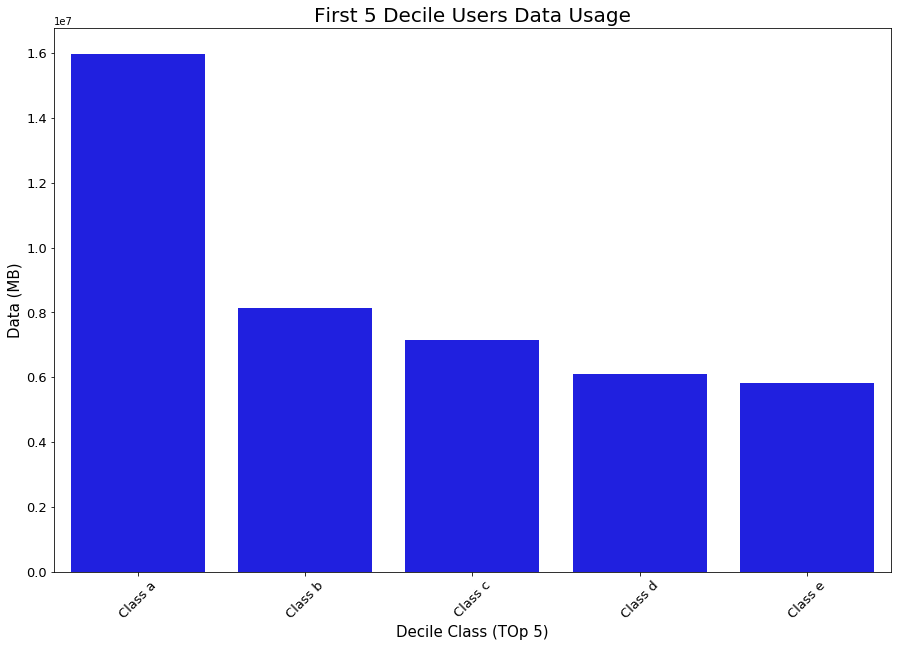

In [904]:
plt.figure(figsize=(15,10))
sns.barplot(x='rank', y='total_data', data=top5_deciles,
            order=top5_deciles['rank'], color='b')
plt.title('First 5 Decile Users Data Usage', fontsize=20)
plt.ylabel('Data (MB)', fontsize=15)
plt.xlabel('Decile Class (TOp 5)', fontsize=15)
plt.xticks(rotation=45, fontsize=13)
plt.yticks(fontsize=13)
plt.savefig('visuals/user_overview/first5Deciles.png', format='png')
plt.show()

> Observations

> There is significant gap among the data usage of the first decile class compared to other classes

> The difference within each classes decreases as new classes are added

>> This could suggest a relationship between data usage and decile classes

>> It also suggests that there might be a uniform/normal distribution in data usage among users

- - -   We can verify this by plotting an histogram of total DL and total UL of all users

Total Downlink Distribution

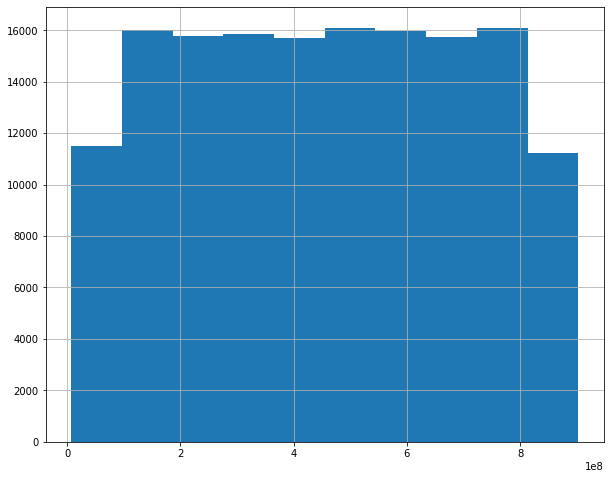

In [905]:
plt.subplots(figsize=(10,8))
data2.total_dl__bytes_.hist()

Total Uplink Distribution

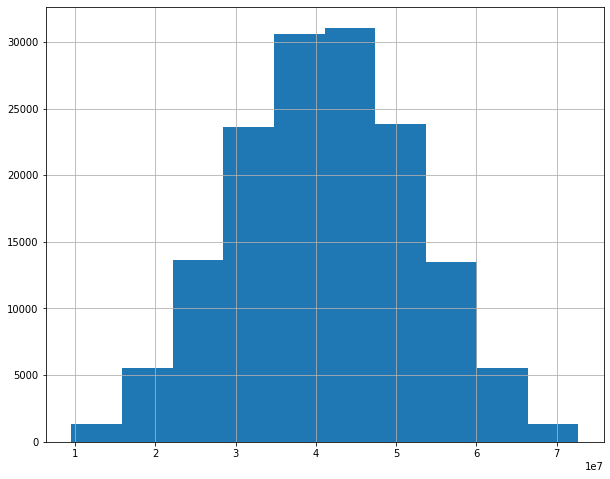

In [906]:
plt.subplots(figsize=(10,8))
data2.total_ul__bytes_.hist()

> The uniform and normal distribution of the above charts  exaplins why four of the top 5 decile classes have no much difference among the classes

<a id="r2"></a>

#### Research Question 2

- User Behaviour in xDR sessions
 
     - What inisghts can be gotten from user behaviour accross the xDR sessions (Data Channel)

#### In answering the question above, we would focus on the following user aggreagations

aggregate per user the following information in the column:

   1. number of xDR sessions
    
   2. session duration
    
   3. the total download (DL) and upload (UL) data
    
   4. the total data volume (in Bytes) during this session for each application

1. number of XDR sessions  per user

In [907]:
data2.bearer_id.value_counts()

                        991
13042425979269199872     16
13042425965944199168     10
13042425981873399808      9
13042425978774599680      9
                       ... 
12682138001973100544      1
6917537685839469568       1
7349883264077020160       1
7277825660878860288       1
7349883251276829696       1
Name: bearer_id, Length: 134709, dtype: int64

> There are empty rows in our columns, let's confirm this

In [908]:
"" in data2.bearer_id.unique().tolist()

True

> This might affect our reporting, so let's drop them

In [909]:
bearers = data.query('bearer_id == "" ')

In [910]:
true_bearers = data.drop(bearers.index, axis=0) 

> Test

In [911]:
"" in true_bearers.bearer_id.unique().tolist()

False

In [912]:
all_xDR_sessions = true_bearers.groupby('msisdn_number')['bearer_id'].count().reset_index(name='count').sort_values(by='count', ascending=False)

In [913]:
all_xDR_sessions

,msisdn_number,count
106468,4.188282e+10,504
13467,3.362632e+10,18
13123,3.362578e+10,17
6404,3.361489e+10,17
36909,3.365973e+10,16
...,...,...
40921,3.366068e+10,1
40920,3.366068e+10,1
40919,3.366068e+10,1
40917,3.366068e+10,1


Non graphical univariate analysis

In [914]:
xDR_stats = all_xDR_sessions.describe().reset_index()

In [915]:
xDR_stats

,index,msisdn_number,count
0,count,1.064720e+05,106472.000000
1,mean,4.515608e+10,1.399523
2,std,2.894629e+12,1.738908
3,min,3.360100e+10,1.000000
4,25%,3.365088e+10,1.000000
5,50%,3.366365e+10,1.000000
6,75%,3.368345e+10,2.000000
7,max,8.823971e+14,504.000000


In [916]:
xDR_stats.rename(columns={'index':'xDR_statistics', 'count':'value'}, inplace=True)

In [917]:
xDR_stats

,xDR_statistics,msisdn_number,value
0,count,1.064720e+05,106472.000000
1,mean,4.515608e+10,1.399523
2,std,2.894629e+12,1.738908
3,min,3.360100e+10,1.000000
4,25%,3.365088e+10,1.000000
5,50%,3.366365e+10,1.000000
6,75%,3.368345e+10,2.000000
7,max,8.823971e+14,504.000000


#### Interpretation

- From the above statistics table, we have `106472.000000` unique users - this signifies the proportion of Tellco Market Share in the telecommunications industry

- The mean of `1.4` signifies the average number of Data Sessions by most user is 1.4

- The minimum number of seesions by users is `1` while the maximum number of seesion is `504.`

- The maximun number of session being 504. is an outlier because  on average users have just one data session with Tellco 

- A value of `1`and 2 across the first 3 quartiles, tells us that most of Tellco users have one data session on thier platform

Graphical Univariate Analysis

histrogam distribution

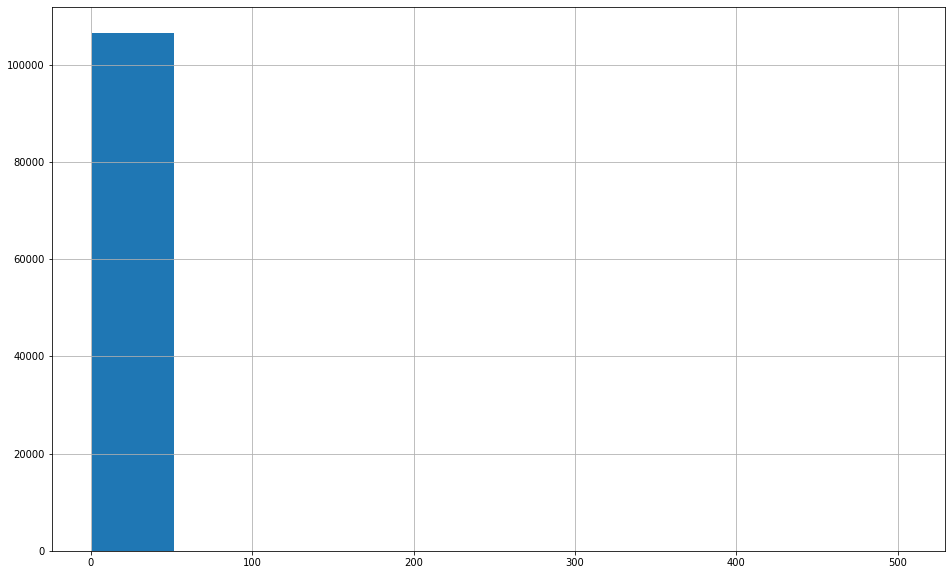

In [918]:
plt.subplots(figsize=(16, 10))
all_xDR_sessions['count'].hist()

> The plot above doesn't seem weel scaled, let's try to normalize it with the z-score

<!-- Graphical Analysis -->

In [919]:
xDR_sessions_z = (all_xDR_sessions['count'] - all_xDR_sessions['count'].mean())/all_xDR_sessions['count'].std(ddof=0)

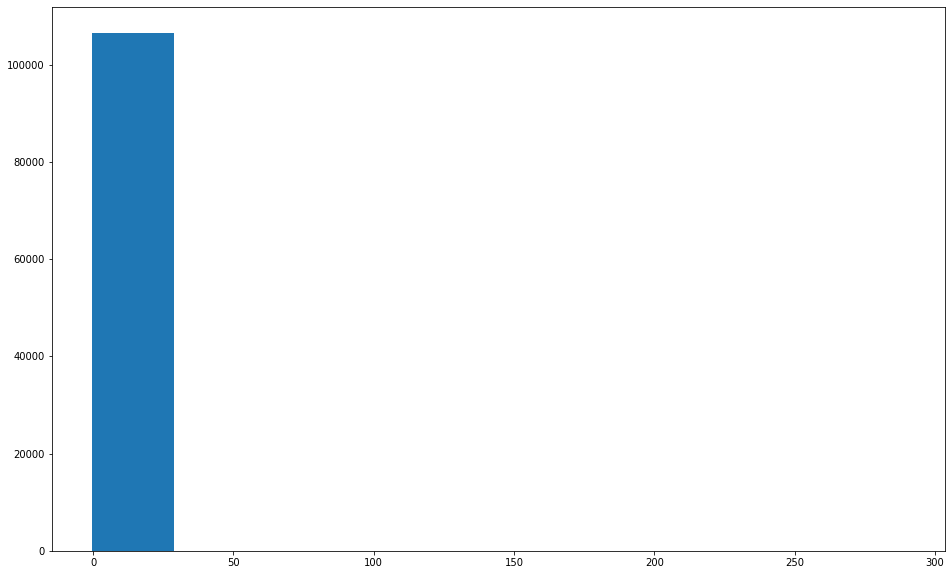

In [920]:
plt.subplots(figsize=(16, 10))
plt.hist(xDR_sessions_z);

> Let's try using numpy log funciton to transform 

In [921]:
xDR_sessions_log = np.log(all_xDR_sessions['count'])

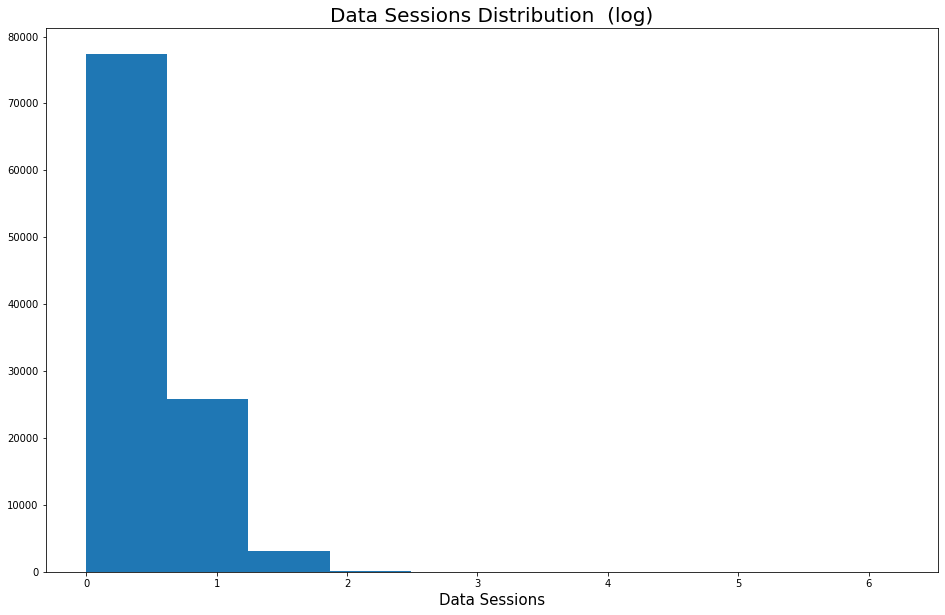

In [922]:
plt.subplots(figsize=(16, 10))
plt.hist((xDR_sessions_log))
plt.title('Data Sessions Distribution  (log)', fontsize=20)
plt.xlabel('Data Sessions', fontsize=15)
plt.savefig('visuals/user_overview/xDRdist.png', format='png')
plt.show()

> The above plot clearly proves that we have a right skewed distribution of xDR sessions,

> This means that most users use below average count of xDR session on Tellco platform

> The top xDR session count are in the range of 1-2

<!-- > The log distributoin is able to let us see an outlier in the range of 15 - 16 -->

Visuallizing, the barplot might be quite too busy on the chart.

Hence we would use visualize the top 10 xDR sessions

In [923]:
top_xDr = all_xDR_sessions.head(10)

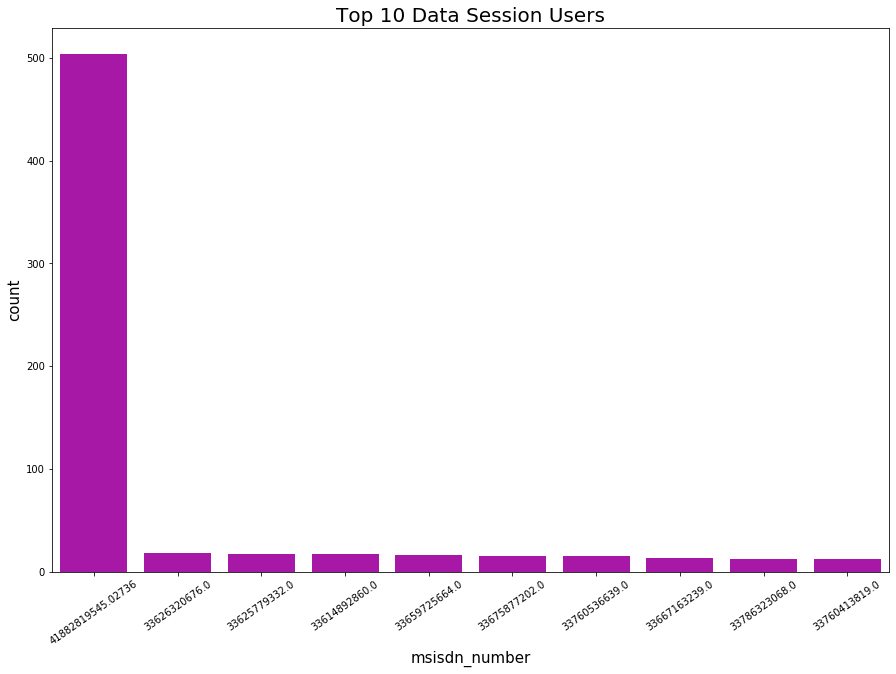

In [924]:
plt.subplots(figsize=(15, 10))
plt.xticks(rotation=35)
plt.xlabel('msisdn_number', fontsize=15)
plt.ylabel('xDR Sessions',fontsize=15)
plt.title('Top 10 Data Session Users', fontsize=20)
sns.barplot(x='msisdn_number', y='count', data=top_xDr, color='m', order=top_xDr.msisdn_number.values.tolist())
plt.savefig('visuals/user_overview/topxDRusers.png', format='png')
plt.show()

#### Observations
> From the above, we can deduce the that most of the top data users, have data sessions count of 1-2

2. session duration

In [925]:
session_duration = true_bearers.groupby('msisdn_number')['dur___ms__1'].sum().reset_index(name='time_spent').sort_values(by='time_spent', ascending=False)
# true_bearers['dur___ms__1']

In [926]:
session_duration

,msisdn_number,time_spent
106468,4.188282e+10,3.051062e+10
36909,3.365973e+10,1.905491e+09
13467,3.362632e+10,1.785435e+09
35296,3.365936e+10,1.748002e+09
76077,3.367588e+10,1.745144e+09
...,...,...
24635,3.365043e+10,7.267018e+06
84831,3.369839e+10,7.258080e+06
35147,3.365933e+10,7.189000e+06
60548,3.366566e+10,7.146574e+06


> To get an accurate description, we have to convert the vlaue in milliseconds to hours

In [927]:
session_duration['time_spent']=session_duration['time_spent'].apply(lambda x: int(x/(1000*60*60)%24))

In [928]:
session_duration.rename(columns={'time_spent':'hours_spent'}, inplace=True)

In [929]:
session_duration

,msisdn_number,hours_spent
106468,4.188282e+10,3
36909,3.365973e+10,1
13467,3.362632e+10,15
35296,3.365936e+10,5
76077,3.367588e+10,4
...,...,...
24635,3.365043e+10,2
84831,3.369839e+10,2
35147,3.365933e+10,1
60548,3.366566e+10,1


Non Graphical Univariate Analysis

In [930]:
sess_dur_stats = session_duration.hours_spent.describe().reset_index()

In [931]:
sess_dur_stats.rename(columns={'index':'session_duration_stats', 'time_spent':'value'}, inplace=True)

In [932]:
sess_dur_stats

,session_duration_stats,hours_spent
0,count,106472.000000
1,mean,12.292659
2,std,7.974156
3,min,0.000000
4,25%,5.000000
5,50%,12.000000
6,75%,21.000000
7,max,23.000000


> I will add sum of the hours to the stats table, and drop count becuase we are dealin with time which is a continuous value

In [933]:
sum_hours = pd.Series({'sum':session_duration.hours_spent.sum()}).reset_index(name='hours_spent')

In [934]:
sum_hours=sum_hours.rename(columns={'index':'session_duration_stats'})

In [935]:
sum_hours = sum_hours.hours_spent.astype('int64')

In [936]:
sum_hours

0    1308824
Name: hours_spent, dtype: int64

In [937]:
sum_ = pd.Series(sum_hours, name='hours_spent').reset_index()
sum_['index'] = 'sum'
sum_=sum_.rename(columns={'index':'session_duration_stats'})
sum_.dtypes

session_duration_stats    object
hours_spent                int64
dtype: object

In [938]:
sum_

,session_duration_stats,hours_spent
0,sum,1308824


In [939]:
sess_dur_stats=sess_dur_stats.append(sum_, ignore_index=True)#.reset_index(drop=True)

In [940]:
sess_dur_stats.hours_spent=sess_dur_stats.hours_spent.astype('int')

In [941]:
sess_dur_stats

,session_duration_stats,hours_spent
0,count,106472
1,mean,12
2,std,7
3,min,0
4,25%,5
5,50%,12
6,75%,21
7,max,23
8,sum,1308824


In [942]:
sess_dur_stats.drop(index=0, inplace=True)

In [943]:
sess_dur_stats

,session_duration_stats,hours_spent
1,mean,12
2,std,7
3,min,0
4,25%,5
5,50%,12
6,75%,21
7,max,23
8,sum,1308824


####  Interpretation

> Total hours spent by all users in the data sessions is `1,308,824 hrs`


> Average hours spent by a user in the data seesion is `12.`

> The minimum number of hours spent by each user is `0 hours`.

>  This means there are users who have never subscribed to Tellco data before

> The maximum number of hours spent by each user is `23 hours`. 

> Half of the users spends `12` on data 

Graphical Univariate Analysis

lets plot the distributuion of hours spent on data

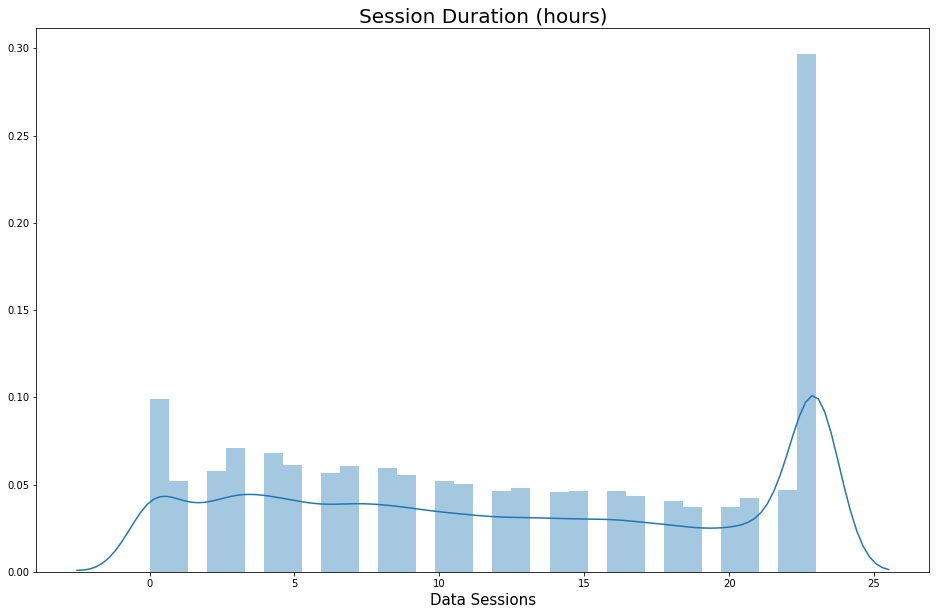

In [944]:
plt.subplots(figsize=(16, 10))
sns.distplot((session_duration['hours_spent']), hist=True)
plt.title('Session Duration (hours)', fontsize=20)
plt.xlabel('Data Sessions', fontsize=15)
plt.savefig('visuals/user_overview/seesion_durationDist.png', format='png')
plt.show()

> The above distribution appears to be left skewed with a normal distributionn occuring at the maximum number of hours.

> We can't make an interpreation now unitl we have another plot 

> Let's try a box plot

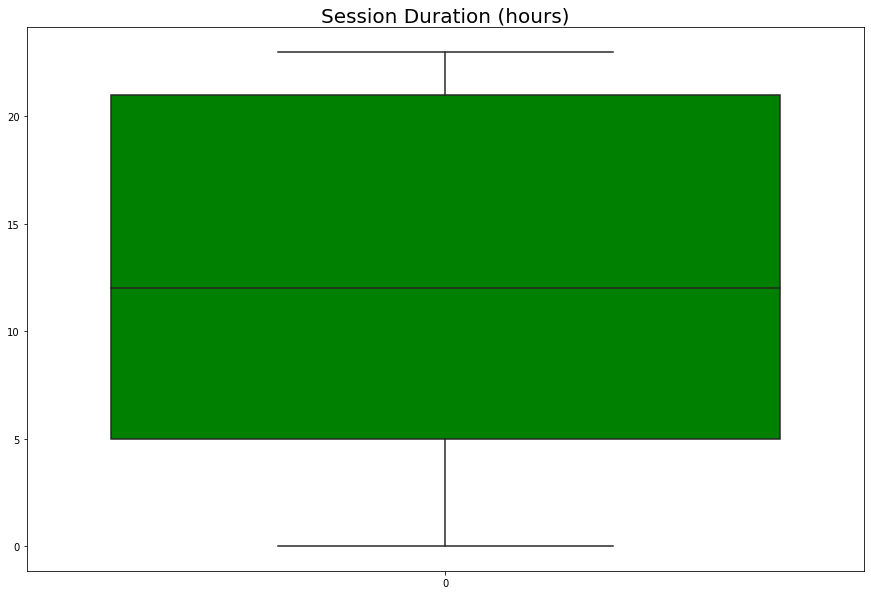

In [945]:
plt.subplots(figsize=(15, 10))
sns.boxplot(data=session_duration['hours_spent'], color='g', saturation=10, )
plt.title('Session Duration (hours)', fontsize = 20)
plt.savefig('visuals/user_overview/seesion_durationBox.png', format='png')
plt.show()

> The above plot shows that there are more seesion hours spent above the average number of hours by most users

3. the total download (DL) and upload (UL) data

In [946]:
data2

,bearer_id,msisdn_number,dur___ms__1,http_dl__bytes_,http_ul__bytes_,activity_duration_dl__ms_,activity_duration_ul__ms_,handset_manufacturer,handset_type,social_media_dl__bytes_,...,youtube_ul__bytes_,netflix_dl__bytes_,netflix_ul__bytes_,gaming_dl__bytes_,gaming_ul__bytes_,other_dl__bytes_,other_ul__bytes_,total_ul__bytes_,total_dl__bytes_,total_DataLink_MB
0,13114483460844900352,3.366496e+10,8.639998e+07,5.477641e+06,471589.06209,37624.00000,38787.000000,samsung,samsung galaxy a5 sm-a520f,1.545765e+06,...,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,3.674974e+07,3.088796e+08,329.6179
1,13114483482878900224,3.368185e+10,8.639998e+07,5.477641e+06,471589.06209,168.00000,3560.000000,samsung,samsung galaxy j5 (sm-j530),1.926113e+06,...,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,5.380039e+07,6.533850e+08,674.4245
2,13114483484080500736,3.376063e+10,8.639998e+07,5.477641e+06,471589.06209,0.00000,0.000000,samsung,samsung galaxy a8 (2018),1.684053e+06,...,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,2.788364e+07,2.798073e+08,293.4370
3,13114483485442799616,3.375034e+10,8.639998e+07,5.477641e+06,471589.06209,3330.00000,37882.000000,undefined,undefined,6.441210e+05,...,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,4.332422e+07,8.460285e+08,848.1529
4,13114483499480700928,3.369980e+10,8.639998e+07,5.477641e+06,471589.06209,0.00000,0.000000,samsung,samsung sm-g390f,8.626000e+05,...,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,3.854281e+07,5.691386e+08,579.5301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,3.365069e+10,8.123076e+07,5.477641e+06,471589.06209,42376.00000,41915.000000,apple,apple iphone 8 plus (a1897),3.464974e+06,...,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,5.762885e+07,5.741753e+08,602.5354
149997,7349883264234609664,3.366345e+10,9.797070e+07,5.477641e+06,471589.06209,17264.00000,16759.000000,apple,apple iphone se (a1723),2.344568e+06,...,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,3.913508e+07,6.666488e+08,673.0880
149998,13114483573367300096,3.362189e+10,9.824953e+07,5.477641e+06,471589.06209,25003.00000,28640.000000,apple,apple iphone xs (a2097),1.245845e+06,...,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,3.491222e+07,5.927864e+08,598.6201
149999,13114483573367300096,3.361962e+10,9.791063e+07,5.477641e+06,471589.06209,13405.00000,34088.000000,huawei,huawei fig-lx1,8.015470e+05,...,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,2.962610e+07,3.718959e+08,382.9212


In [947]:
true_bearers_data_usage=true_bearers.join(data2['total_DataLink_MB'], how='inner')

In [948]:
data_usage = true_bearers_data_usage.groupby('msisdn_number')['total_DataLink_MB'].sum().reset_index(name='total_data_usage').sort_values(by='total_data_usage', ascending=False)
# true_bearers['dur___ms__1']

In [949]:
data_usage

,msisdn_number,total_data_usage
106468,4.188282e+10,242283.2519
6404,3.361489e+10,8436.4191
92584,3.376054e+10,8120.3213
13123,3.362578e+10,8105.8701
13467,3.362632e+10,7601.8975
...,...,...
75879,3.367548e+10,36.2609
104396,3.378251e+10,36.1721
63430,3.366668e+10,32.4246
43516,3.366132e+10,32.0204


Non Graphical Univariate Analysis

In [950]:
data_usage_stats = data_usage.describe().reset_index()

In [951]:
data_usage_stats

,index,msisdn_number,total_data_usage
0,count,1.064720e+05,106472.000000
1,mean,4.515608e+10,661.751831
2,std,2.894629e+12,876.388267
3,min,3.360100e+10,31.708700
4,25%,3.365088e+10,342.213175
5,50%,3.366365e+10,589.679450
6,75%,3.368345e+10,818.113325
7,max,8.823971e+14,242283.251900


In [952]:
data_usage_stats.rename(columns={'index':'data_usage_stats', 'total_data_usage':'value'}, inplace=True)

In [953]:
data_usage_stats

,data_usage_stats,msisdn_number,value
0,count,1.064720e+05,106472.000000
1,mean,4.515608e+10,661.751831
2,std,2.894629e+12,876.388267
3,min,3.360100e+10,31.708700
4,25%,3.365088e+10,342.213175
5,50%,3.366365e+10,589.679450
6,75%,3.368345e+10,818.113325
7,max,8.823971e+14,242283.251900


> I will add sum of the data usage to the stats table and remove the count

In [954]:
sum_data = pd.Series({'sum':data_usage.total_data_usage.sum()}).reset_index(name='value')

In [955]:
sum_data

,index,value
0,sum,7.045804e+07


In [956]:
sum_data=sum_data.rename(columns={'index':'data_usage_stats'})

In [957]:
sum_data

,data_usage_stats,value
0,sum,7.045804e+07


In [958]:
data_usage_stats=data_usage_stats.append(sum_data).reset_index(drop=True)

In [959]:
data_usage_stats.value = data_usage_stats.value.astype('int64')

In [960]:
data_usage_stats

,data_usage_stats,msisdn_number,value
0,count,1.064720e+05,106472
1,mean,4.515608e+10,661
2,std,2.894629e+12,876
3,min,3.360100e+10,31
4,25%,3.365088e+10,342
5,50%,3.366365e+10,589
6,75%,3.368345e+10,818
7,max,8.823971e+14,242283
8,sum,NaN,70458040


In [961]:
data_usage_stats.drop(index=0, inplace=True)

In [962]:
data_usage_stats

,data_usage_stats,msisdn_number,value
1,mean,4.515608e+10,661
2,std,2.894629e+12,876
3,min,3.360100e+10,31
4,25%,3.365088e+10,342
5,50%,3.366365e+10,589
6,75%,3.368345e+10,818
7,max,8.823971e+14,242283
8,sum,NaN,70458040


<!-- ####  Interpretation

> Total hamount of data spent by all users in the data sessions is `73,880,860,000,00092 bytes`

> Average data spent by a user is `12.90118`, appx `548,451,900 bytes`

> The minimum number of hours spent by each user is `0 hours`.

>  This means there are users who have never subscribed to Tellco data before

> The maximum number of hours spent by each user is `0 hours`. 

> This means there are users who have never subscribed to Tellco data before

> Half of the users spends `12.6 hrs` on data  -->

Graphical Univariate Analysis

lets plot the distributuion of hours spent on data

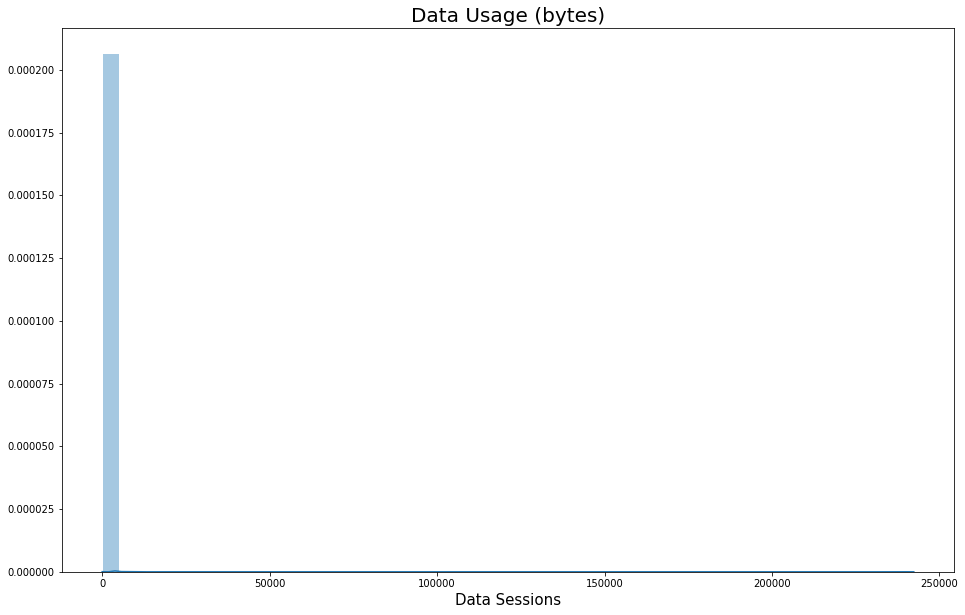

In [963]:
plt.subplots(figsize=(16, 10))
sns.distplot((data_usage['total_data_usage']), hist=True)
plt.title('Data Usage (bytes)', fontsize=20)
plt.xlabel('Data Sessions', fontsize=15)
plt.savefig('visuals/user_overview/dataUsageDist.png', format='png')
plt.show()

#### Interpration

> Data usage is right skewed, which means we have less users who use above average data usage

> Another way to say this is that more of our users use below average data usage

4

In [964]:
to_app_data = data2[['social_media_dl__bytes_', 'social_media_ul__bytes_',
       'google_dl__bytes_', 'google_ul__bytes_', 'email_dl__bytes_',
       'email_ul__bytes_', 'youtube_dl__bytes_', 'youtube_ul__bytes_',
       'netflix_dl__bytes_', 'netflix_ul__bytes_', 'gaming_dl__bytes_','other_ul__bytes_'
                     ,'other_dl__bytes_',
       'gaming_ul__bytes_','total_DataLink_MB' ]]

In [965]:
to_app_data

,social_media_dl__bytes_,social_media_ul__bytes_,google_dl__bytes_,google_ul__bytes_,email_dl__bytes_,email_ul__bytes_,youtube_dl__bytes_,youtube_ul__bytes_,netflix_dl__bytes_,netflix_ul__bytes_,gaming_dl__bytes_,other_ul__bytes_,other_dl__bytes_,gaming_ul__bytes_,total_DataLink_MB
0,1.545765e+06,24420.00000,1.634479e+06,1.271433e+06,3.563542e+06,137762.00000,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,8.814393e+06,1.717444e+08,1.434415e+07,329.6179
1,1.926113e+06,7165.00000,3.493924e+06,9.201720e+05,6.290460e+05,308339.00000,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.505514e+07,5.269042e+08,1.170709e+06,674.4245
2,1.684053e+06,42224.00000,8.535055e+06,1.694064e+06,2.690151e+06,672973.00000,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,4.215763e+06,4.106926e+08,3.956300e+05,293.4370
3,6.441210e+05,13372.00000,9.023734e+06,2.788027e+06,1.439754e+06,631229.00000,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.279728e+07,7.490399e+08,1.084972e+07,848.1529
4,8.626000e+05,50188.00000,6.248284e+06,1.500559e+06,1.936496e+06,173853.00000,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,1.391032e+07,5.507095e+08,3.529801e+06,579.5301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,3.464974e+06,52091.00000,9.967603e+06,2.817311e+06,5.763900e+04,633237.00000,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,1.348742e+07,3.264510e+06,9.197207e+06,602.5354
149997,2.344568e+06,7613.00000,2.229420e+06,2.185941e+06,1.954414e+06,167304.00000,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,2.457758e+06,7.121804e+08,4.735033e+06,673.0880
149998,1.245845e+06,14394.00000,3.850890e+06,2.734579e+06,1.525734e+06,532543.00000,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.131473e+07,1.211009e+08,1.339432e+07,598.6201
149999,8.015470e+05,21562.00000,4.189773e+06,3.567494e+06,2.228270e+06,622644.00000,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,1.406930e+06,8.147131e+08,2.529475e+06,382.9212


In [966]:
app_data = pd.DataFrame()

In [967]:
app_data['users'] = data2.bearer_id

In [968]:
app_data['social_media'] = to_app_data.social_media_dl__bytes_ + to_app_data.social_media_ul__bytes_

In [969]:
app_data['google'] = to_app_data.google_dl__bytes_ + to_app_data.google_ul__bytes_

In [970]:
app_data['email'] = to_app_data.email_dl__bytes_ + to_app_data.email_ul__bytes_

In [971]:
app_data['youtube'] = to_app_data.youtube_dl__bytes_ + to_app_data.youtube_ul__bytes_

In [972]:
app_data['netflix'] = to_app_data.netflix_dl__bytes_ + to_app_data.netflix_ul__bytes_

In [973]:
app_data['gaming'] = to_app_data.gaming_dl__bytes_ + to_app_data.gaming_ul__bytes_

In [974]:
app_data['others'] = to_app_data.other_dl__bytes_ + to_app_data.other_ul__bytes_

In [975]:
app_data

,users,social_media,google,email,youtube,netflix,gaming,others
0,13114483460844900352,1.570185e+06,2.905912e+06,3.701304e+06,1.835594e+07,1.785519e+07,2.924265e+08,1.805588e+08
1,13114483482878900224,1.933278e+06,4.414096e+06,9.373850e+05,3.935912e+07,3.556554e+07,6.099208e+08,5.419594e+08
2,13114483484080500736,1.726277e+06,1.022912e+07,3.363124e+06,3.442524e+07,2.375120e+07,2.299803e+08,4.149084e+08
3,13114483485442799616,6.574930e+05,1.181176e+07,2.070983e+06,3.653476e+07,1.509259e+07,8.103879e+08,7.618372e+08
4,13114483499480700928,9.127880e+05,7.748843e+06,2.110349e+06,3.422225e+07,1.753980e+07,5.312370e+08,5.646198e+08
...,...,...,...,...,...,...,...,...
149996,7277825670196679680,3.517065e+06,1.278491e+07,6.908760e+05,2.795510e+07,3.756186e+07,5.358069e+08,1.675193e+07
149997,7349883264234609664,2.352181e+06,4.415361e+06,2.121718e+06,2.216552e+07,4.064329e+07,6.316281e+08,7.146381e+08
149998,13114483573367300096,1.260239e+06,6.585469e+06,2.058277e+06,2.451641e+07,1.502970e+07,5.669338e+08,1.324156e+08
149999,13114483573367300096,8.231090e+05,7.757267e+06,2.850914e+06,1.712251e+07,1.649484e+07,3.550664e+08,8.161200e+08


Non graphical univariate analyis

In [976]:
app_data_stats = app_data.iloc[:, 1:].describe()

In [977]:
app_data_stats

,social_media,google,email,youtube,netflix,gaming,others
count,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05
mean,1.828250e+06,7.807295e+06,2.259102e+06,2.264348e+07,2.262861e+07,4.303331e+08,4.293653e+08
std,1.035646e+06,3.516420e+06,1.071109e+06,9.246800e+06,9.260820e+06,2.440199e+08,2.432681e+08
min,1.563000e+03,4.033000e+04,8.359000e+03,7.890300e+04,9.843200e+04,3.063580e+05,1.490450e+05
25%,9.322180e+05,4.943599e+06,1.359344e+06,1.599846e+07,1.597946e+07,2.187279e+08,2.185534e+08
50%,1.826471e+06,7.812835e+06,2.263567e+06,2.266177e+07,2.263554e+07,4.316150e+08,4.299865e+08
75%,2.727487e+06,1.068280e+07,3.159818e+06,2.929260e+07,2.929044e+07,6.414159e+08,6.399275e+08
max,3.650861e+06,1.552878e+07,4.518036e+06,4.519008e+07,4.519815e+07,8.592028e+08,8.595209e+08


5

In [978]:
vals = [app_data.social_media.sum(), app_data.google.sum(), app_data.email.sum(), 
          app_data.youtube.sum(), app_data.netflix.sum(), app_data.gaming.sum(), app_data.others.sum()]

In [979]:
vals

[274239359454.20804,
 1171101989130.5457,
 338867605596.30994,
 3396545039272.6387,
 3394313609363.5386,
 64550395439016.7,
 64405230908181.62]

In [980]:
total_app_data = pd.DataFrame(columns=app_data.columns.to_list()[1:],data=[vals])

In [981]:
total_app_data=total_app_data.transpose().reset_index().rename(columns={'index':'application', 0:'total_data'})

In [982]:
total_app_data = total_app_data.sort_values(by='total_data', ascending=False)
total_app_data

,application,total_data
5,gaming,6.455040e+13
6,others,6.440523e+13
3,youtube,3.396545e+12
4,netflix,3.394314e+12
1,google,1.171102e+12
2,email,3.388676e+11
0,social_media,2.742394e+11


Application data

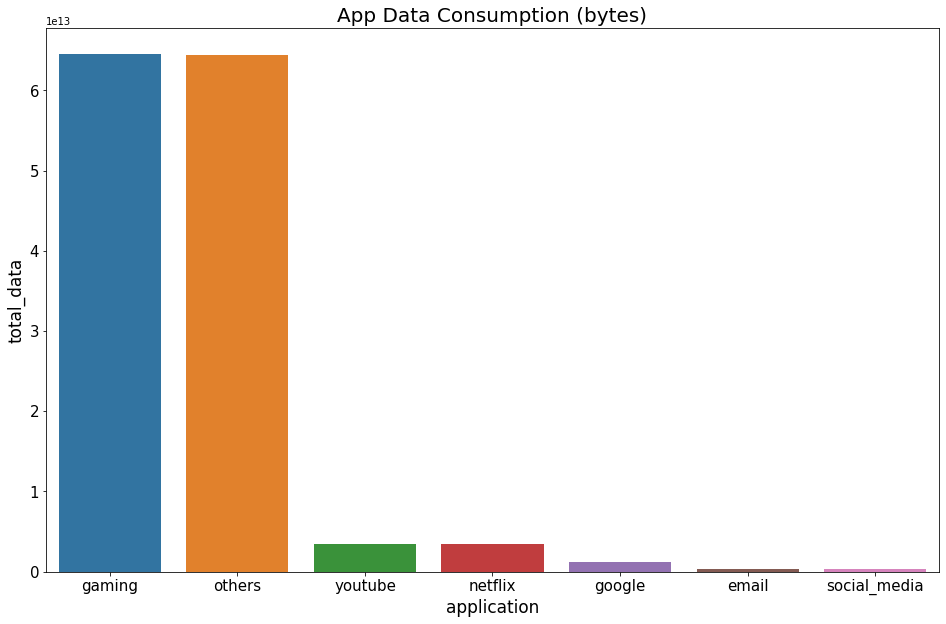

In [983]:
plt.subplots(figsize=(16,10))
plt.title('App Data Consumption (bytes)', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Application', fontsize=17)
plt.ylabel('Data Use (bytes)', fontsize=17)
sns.barplot(data=total_app_data, x='application', y='total_data')
plt.savefig(format='png', fname='visuals/user_overview/appData.png')
plt.show()

#### Interpretation

> From the above, we can clearly see that gaming application has the highest data usage by users
> followed by other applications

> Let's try a bivariate analysis

In [984]:
app_data_heat = app_data.drop(columns='users')

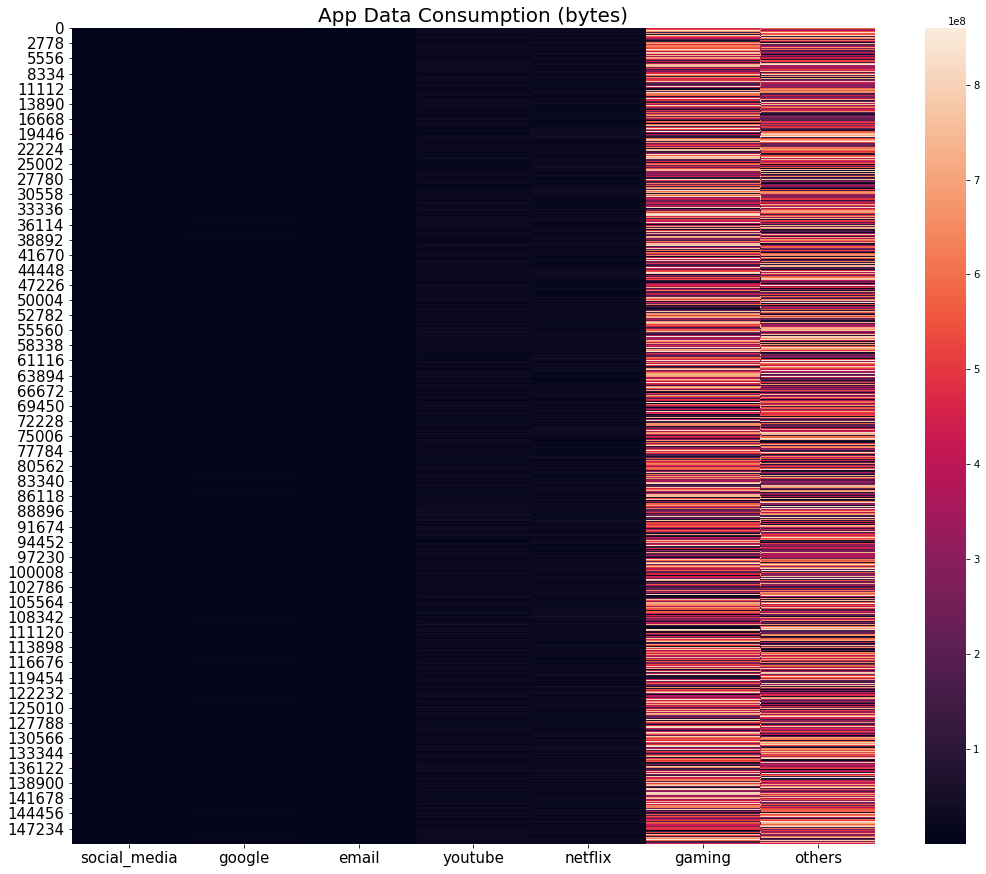

In [985]:
plt.subplots(figsize=(18,15))
plt.title('App Data Consumption (bytes)', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
sns.heatmap(app_data_heat)
plt.savefig(format='png', fname='visuals/user_overview/appDataHeat.png')

Interpreation

> The above best exaplains the bar chart..

> our legend ranges from low values (dark red) to high values (light - red)

> Gaming application & other application have the highest colour heat of high values

> This further accentuates the fact that gaming application & other applicationhas the highest data consumption among other applications

> The data cinsumption of other applications are very low relative to that of gaming  and other application

<a id='r3'></a>

#### Research Question 3
 
   - Siginificant Relationships 
   
    -  Are  there an existing significant relationship across
          
             1. each application & the total DL+UL data
          
             2. the various xDR sessions (Google,Youtbe,Netflix, etc.)

#### To answer the above research question, we would be doing the following

- Compute a correlation matrix for
>   SocialMedia data, Google data, Email data,Youtube data, Netflix data,Gaming data,Other data 
 
- Perform a principal component analysis to reduce the dimension of the data 
>     provide useful interpretation of the results 

#### Correlation Matrix for the applications

> get the columns of these applications from the main dataframe

In [986]:
data2.columns

Index(['bearer_id', 'msisdn_number', 'dur___ms__1', 'http_dl__bytes_',
       'http_ul__bytes_', 'activity_duration_dl__ms_',
       'activity_duration_ul__ms_', 'handset_manufacturer', 'handset_type',
       'social_media_dl__bytes_', 'social_media_ul__bytes_',
       'google_dl__bytes_', 'google_ul__bytes_', 'email_dl__bytes_',
       'email_ul__bytes_', 'youtube_dl__bytes_', 'youtube_ul__bytes_',
       'netflix_dl__bytes_', 'netflix_ul__bytes_', 'gaming_dl__bytes_',
       'gaming_ul__bytes_', 'other_dl__bytes_', 'other_ul__bytes_',
       'total_ul__bytes_', 'total_dl__bytes_', 'total_DataLink_MB'],
      dtype='object')

In [987]:
app_data2 = data2[[ 'social_media_dl__bytes_',
       'social_media_ul__bytes_', 'google_dl__bytes_', 'google_ul__bytes_',
       'email_dl__bytes_', 'email_ul__bytes_', 'youtube_dl__bytes_',
       'youtube_ul__bytes_', 'netflix_dl__bytes_', 'netflix_ul__bytes_',
       'gaming_dl__bytes_', 'gaming_ul__bytes_', 'other_dl__bytes_',
       'other_ul__bytes_']]

claculayte the correlation

In [988]:
app_dataCorr = app_data2.corr(method='pearson')

In [989]:
app_dataCorr

,social_media_dl__bytes_,social_media_ul__bytes_,google_dl__bytes_,google_ul__bytes_,email_dl__bytes_,email_ul__bytes_,youtube_dl__bytes_,youtube_ul__bytes_,netflix_dl__bytes_,netflix_ul__bytes_,gaming_dl__bytes_,gaming_ul__bytes_,other_dl__bytes_,other_ul__bytes_
social_media_dl__bytes_,1.000000,-0.000555,-0.001954,0.000186,0.004745,-0.002518,-0.001389,0.002345,-0.001817,0.003457,0.001018,0.003095,0.006126,0.000610
social_media_ul__bytes_,-0.000555,1.000000,0.003542,0.001085,0.004823,-0.001427,-0.001786,-0.002368,-0.000772,-0.002493,0.000210,0.000844,-0.003850,0.000971
google_dl__bytes_,-0.001954,0.003542,1.000000,-0.000103,-0.000039,0.000742,0.001760,0.000638,0.000548,-0.001569,-0.001421,-0.001429,-0.002557,-0.000882
google_ul__bytes_,0.000186,0.001085,-0.000103,1.000000,-0.001157,-0.002050,0.001122,0.001670,-0.001288,-0.004073,0.001140,-0.002516,0.002097,-0.002219
email_dl__bytes_,0.004745,0.004823,-0.000039,-0.001157,1.000000,0.002553,0.001679,-0.004305,0.001351,-0.000016,0.000050,-0.004335,-0.000444,0.004675
email_ul__bytes_,-0.002518,-0.001427,0.000742,-0.002050,0.002553,1.000000,-0.000320,-0.006834,-0.000011,0.000532,-0.002519,0.005000,-0.003805,0.000081
youtube_dl__bytes_,-0.001389,-0.001786,0.001760,0.001122,0.001679,-0.000320,1.000000,0.002433,0.001202,0.001746,-0.001861,-0.001893,0.002042,-0.004830
youtube_ul__bytes_,0.002345,-0.002368,0.000638,0.001670,-0.004305,-0.006834,0.002433,1.000000,0.000423,0.002477,-0.002382,0.000898,0.002296,-0.001393
netflix_dl__bytes_,-0.001817,-0.000772,0.000548,-0.001288,0.001351,-0.000011,0.001202,0.000423,1.000000,0.001065,-0.003201,-0.000633,-0.006000,-0.002588
netflix_ul__bytes_,0.003457,-0.002493,-0.001569,-0.004073,-0.000016,0.000532,0.001746,0.002477,0.001065,1.000000,-0.001051,-0.004015,-0.006691,-0.003447


> PLot correlation

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]),
 <a list of 14 Text yticklabel objects>)

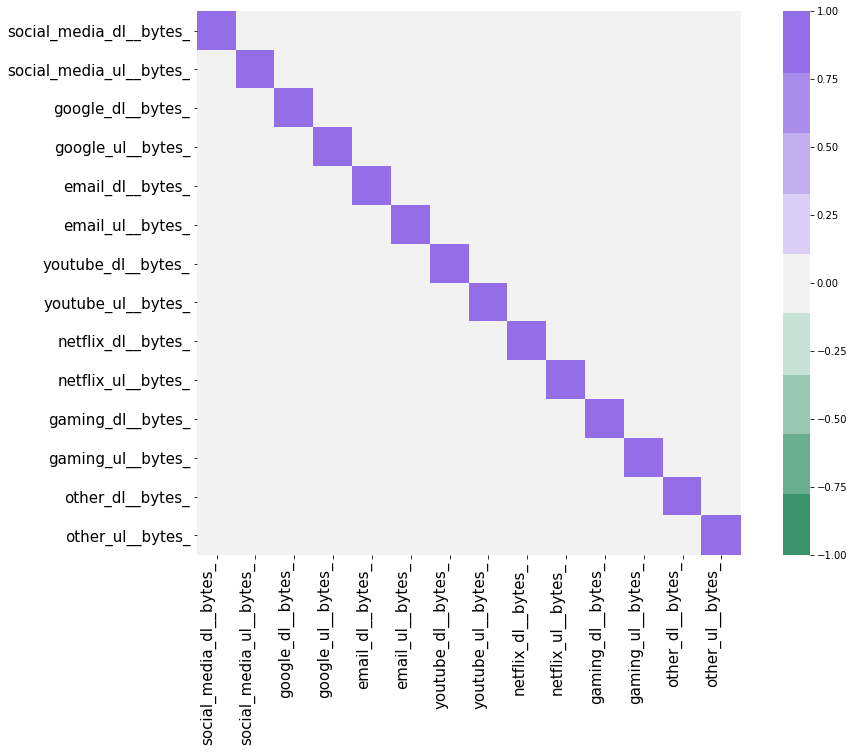

In [990]:
plt.subplots(figsize=(15, 10))
ax = sns.heatmap(
    app_dataCorr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(150, 275, s=80, l=55, n=9),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

> The above heatmap, shows that there is a very low corralation among the various applications without adding thier uplink and donwlink

##### Let's add the application data together iand see if there would be a difference

In [991]:
app_data2

,social_media_dl__bytes_,social_media_ul__bytes_,google_dl__bytes_,google_ul__bytes_,email_dl__bytes_,email_ul__bytes_,youtube_dl__bytes_,youtube_ul__bytes_,netflix_dl__bytes_,netflix_ul__bytes_,gaming_dl__bytes_,gaming_ul__bytes_,other_dl__bytes_,other_ul__bytes_
0,1.545765e+06,24420.00000,1.634479e+06,1.271433e+06,3.563542e+06,137762.00000,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06
1,1.926113e+06,7165.00000,3.493924e+06,9.201720e+05,6.290460e+05,308339.00000,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07
2,1.684053e+06,42224.00000,8.535055e+06,1.694064e+06,2.690151e+06,672973.00000,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06
3,6.441210e+05,13372.00000,9.023734e+06,2.788027e+06,1.439754e+06,631229.00000,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07
4,8.626000e+05,50188.00000,6.248284e+06,1.500559e+06,1.936496e+06,173853.00000,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,3.464974e+06,52091.00000,9.967603e+06,2.817311e+06,5.763900e+04,633237.00000,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07
149997,2.344568e+06,7613.00000,2.229420e+06,2.185941e+06,1.954414e+06,167304.00000,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06
149998,1.245845e+06,14394.00000,3.850890e+06,2.734579e+06,1.525734e+06,532543.00000,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07
149999,8.015470e+05,21562.00000,4.189773e+06,3.567494e+06,2.228270e+06,622644.00000,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06


In [992]:
total_app_data2 = pd.DataFrame()

total_app_data2['social_media'] = app_data2.social_media_dl__bytes_ + app_data2.social_media_ul__bytes_

total_app_data2['google'] = app_data2.google_dl__bytes_ + app_data2.google_ul__bytes_

total_app_data2['email'] = app_data2.email_dl__bytes_ + app_data2.email_ul__bytes_

total_app_data2['youtube'] = app_data2.youtube_dl__bytes_ + app_data2.youtube_ul__bytes_

total_app_data2['netflix'] = app_data2.netflix_dl__bytes_ + app_data2.netflix_ul__bytes_

total_app_data2['gaming'] = app_data2.gaming_dl__bytes_ + app_data2.gaming_ul__bytes_

total_app_data2['other'] = app_data2.other_dl__bytes_ + app_data2.other_ul__bytes_

total_app_data2

,social_media,google,email,youtube,netflix,gaming,other
0,1.570185e+06,2.905912e+06,3.701304e+06,1.835594e+07,1.785519e+07,2.924265e+08,1.805588e+08
1,1.933278e+06,4.414096e+06,9.373850e+05,3.935912e+07,3.556554e+07,6.099208e+08,5.419594e+08
2,1.726277e+06,1.022912e+07,3.363124e+06,3.442524e+07,2.375120e+07,2.299803e+08,4.149084e+08
3,6.574930e+05,1.181176e+07,2.070983e+06,3.653476e+07,1.509259e+07,8.103879e+08,7.618372e+08
4,9.127880e+05,7.748843e+06,2.110349e+06,3.422225e+07,1.753980e+07,5.312370e+08,5.646198e+08
...,...,...,...,...,...,...,...
149996,3.517065e+06,1.278491e+07,6.908760e+05,2.795510e+07,3.756186e+07,5.358069e+08,1.675193e+07
149997,2.352181e+06,4.415361e+06,2.121718e+06,2.216552e+07,4.064329e+07,6.316281e+08,7.146381e+08
149998,1.260239e+06,6.585469e+06,2.058277e+06,2.451641e+07,1.502970e+07,5.669338e+08,1.324156e+08
149999,8.231090e+05,7.757267e+06,2.850914e+06,1.712251e+07,1.649484e+07,3.550664e+08,8.161200e+08


In [993]:
total_app_dataCorr = total_app_data2.corr(method='pearson')

PLot Correlation

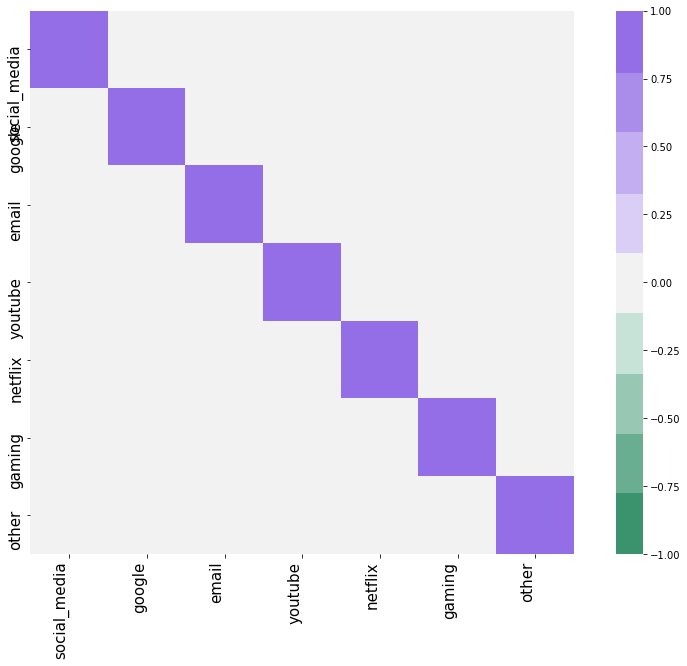

In [994]:
plt.subplots(figsize=(15, 10))
ax = sns.heatmap(
    total_app_dataCorr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(150, 275, s=80, l=55, n=9),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig(format='png', fname='visuals/user_overview/appDataCorr.png')
plt.show()

#### Interpretation

> There is no very little or no correaltion between the various application data usage

> Hence the use of one does not significantly affect the usage of the other

##### Now Let's perform PCA on the application data  using the PCA modlue from skLearn library

> Preprocess data 

In [995]:
num_data = data2.select_dtypes(include='number')

In [996]:
num_data

,msisdn_number,dur___ms__1,http_dl__bytes_,http_ul__bytes_,activity_duration_dl__ms_,activity_duration_ul__ms_,social_media_dl__bytes_,social_media_ul__bytes_,google_dl__bytes_,google_ul__bytes_,...,youtube_ul__bytes_,netflix_dl__bytes_,netflix_ul__bytes_,gaming_dl__bytes_,gaming_ul__bytes_,other_dl__bytes_,other_ul__bytes_,total_ul__bytes_,total_dl__bytes_,total_DataLink_MB
0,3.366496e+10,8.639998e+07,5.477641e+06,471589.06209,37624.00000,38787.000000,1.545765e+06,24420.00000,1.634479e+06,1.271433e+06,...,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,3.674974e+07,3.088796e+08,329.6179
1,3.368185e+10,8.639998e+07,5.477641e+06,471589.06209,168.00000,3560.000000,1.926113e+06,7165.00000,3.493924e+06,9.201720e+05,...,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,5.380039e+07,6.533850e+08,674.4245
2,3.376063e+10,8.639998e+07,5.477641e+06,471589.06209,0.00000,0.000000,1.684053e+06,42224.00000,8.535055e+06,1.694064e+06,...,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,2.788364e+07,2.798073e+08,293.4370
3,3.375034e+10,8.639998e+07,5.477641e+06,471589.06209,3330.00000,37882.000000,6.441210e+05,13372.00000,9.023734e+06,2.788027e+06,...,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,4.332422e+07,8.460285e+08,848.1529
4,3.369980e+10,8.639998e+07,5.477641e+06,471589.06209,0.00000,0.000000,8.626000e+05,50188.00000,6.248284e+06,1.500559e+06,...,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,3.854281e+07,5.691386e+08,579.5301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,3.365069e+10,8.123076e+07,5.477641e+06,471589.06209,42376.00000,41915.000000,3.464974e+06,52091.00000,9.967603e+06,2.817311e+06,...,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,5.762885e+07,5.741753e+08,602.5354
149997,3.366345e+10,9.797070e+07,5.477641e+06,471589.06209,17264.00000,16759.000000,2.344568e+06,7613.00000,2.229420e+06,2.185941e+06,...,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,3.913508e+07,6.666488e+08,673.0880
149998,3.362189e+10,9.824953e+07,5.477641e+06,471589.06209,25003.00000,28640.000000,1.245845e+06,14394.00000,3.850890e+06,2.734579e+06,...,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,3.491222e+07,5.927864e+08,598.6201
149999,3.361962e+10,9.791063e+07,5.477641e+06,471589.06209,13405.00000,34088.000000,8.015470e+05,21562.00000,4.189773e+06,3.567494e+06,...,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,2.962610e+07,3.718959e+08,382.9212


In [997]:
pca_data = StandardScaler().fit_transform(num_data)
pca_data = pd.DataFrame(pca_data, columns=num_data.columns)

In [998]:
pca_data

,msisdn_number,dur___ms__1,http_dl__bytes_,http_ul__bytes_,activity_duration_dl__ms_,activity_duration_ul__ms_,social_media_dl__bytes_,social_media_ul__bytes_,google_dl__bytes_,google_ul__bytes_,...,youtube_ul__bytes_,netflix_dl__bytes_,netflix_ul__bytes_,gaming_dl__bytes_,gaming_ul__bytes_,other_dl__bytes_,other_ul__bytes_,total_ul__bytes_,total_dl__bytes_,total_DataLink_MB
0,-3.369738e-03,-1.132175e-01,-2.476507e-16,0.0,-0.344898,-3.673613e-01,-2.410062e-01,-0.447668,-1.243931e+00,-6.598037e-01,...,-1.340826,-0.509712,-0.211575,-5.900904e-01,1.266183e+00,-1.025295,1.152432e-01,-0.390281,-0.597047,-6.143562e-01
1,-3.362811e-03,-1.132175e-01,-2.476507e-16,0.0,-0.468541,-4.977458e-01,1.263099e-01,-1.355534,-6.820097e-01,-9.550026e-01,...,1.276880,0.997973,0.978915,7.652905e-01,-1.488221e+00,0.435041,1.423855e+00,1.132495,0.814043,8.651520e-01
2,-3.330510e-03,-1.132175e-01,-2.476507e-16,0.0,-0.469096,-5.109223e-01,-1.074563e-01,0.489083,8.414113e-01,-3.046256e-01,...,0.581550,0.886360,-0.760810,-7.888785e-01,-1.650280e+00,-0.042795,-8.490348e-01,-1.182104,-0.716127,-7.696025e-01
3,-3.334727e-03,-1.132175e-01,-2.476507e-16,0.0,-0.458103,-3.707109e-01,-1.111757e+00,-1.028955,9.890893e-01,6.147383e-01,...,0.652005,0.352078,-1.557333,1.547316e+00,5.355411e-01,1.348412,9.504079e-01,0.196879,1.603109,1.610592e+00
4,-3.355454e-03,-1.132175e-01,-2.476507e-16,0.0,-0.469096,-5.109223e-01,-9.007637e-01,0.908106,1.503531e-01,-4.672467e-01,...,1.253421,0.817482,-1.664689,4.331024e-01,-9.949638e-01,0.532922,1.183799e+00,-0.230144,0.468971,4.579758e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,-3.375591e-03,-2.180822e-01,-2.476507e-16,0.0,-0.329212,-3.557837e-01,1.612445e+00,1.008232,1.274325e+00,6.393485e-01,...,0.118829,0.930360,1.364329,4.286035e-01,1.900207e-01,-1.718046,1.095121e+00,1.474411,0.489601,5.566877e-01
149997,-3.370358e-03,1.215104e-01,-2.476507e-16,0.0,-0.412107,-4.488928e-01,5.304273e-01,-1.331963,-1.064141e+00,1.087467e-01,...,-0.428834,1.148412,1.618279,8.396571e-01,-7.429647e-01,1.196854,-1.217667e+00,-0.177249,0.868372,8.594173e-01
149998,-3.387399e-03,1.271667e-01,-2.476507e-16,0.0,-0.386561,-4.049180e-01,-5.306499e-01,-0.975183,-5.741352e-01,5.698207e-01,...,-1.442542,-0.247266,-0.933411,5.389866e-01,1.067584e+00,-1.233530,6.395339e-01,-0.554388,0.565832,5.398878e-01
149999,-3.388329e-03,1.202917e-01,-2.476507e-16,0.0,-0.424846,-3.847535e-01,-9.597249e-01,-0.598041,-4.717253e-01,1.269801e+00,...,-0.426137,-1.234849,0.341355,-2.849067e-01,-1.204120e+00,1.618445,-1.438014e+00,-1.026487,-0.338933,-3.856406e-01


> Calcualte PCA

In [999]:
pcamodel = PCA(n_components=5)
pca = pcamodel.fit_transform(pca_data)
pca.shape

(150001, 5)

In [1000]:
pca

array([[ 1.05178680e+00, -4.95720717e-01, -4.43423610e-01,
        -6.39409786e-02,  4.85511228e-01],
       [-1.48092627e+00,  1.60349320e+00, -5.42694095e-01,
        -9.53930808e-02, -7.11121224e-01],
       [ 1.33393207e+00, -1.57311896e+00, -6.71472638e-01,
        -8.89174285e-02,  9.05122090e-01],
       ...,
       [-9.41490702e-01, -7.76640873e-01, -5.54053500e-01,
        -3.34771726e-02, -2.60133870e-02],
       [ 6.53272752e-01, -1.44970507e+00, -6.29043782e-01,
         1.03806716e-01, -8.99379774e-01],
       [ 2.83529644e-08, -1.48168656e-10, -1.88459019e-10,
         1.28131301e-10, -4.73198776e-11]])

Get the pca properties

In [1001]:
pcamodel.components_

array([[ 2.88871458e-03, -3.86518414e-03, -3.77356731e-03,
        -1.86023490e-03,  4.42795945e-03,  3.56521697e-03,
        -3.87421691e-03, -6.14008316e-05, -6.69709071e-03,
        -3.11224789e-03, -2.67250851e-03,  1.08940648e-03,
        -1.35328629e-02, -1.15244335e-02, -1.24741058e-02,
        -1.33957997e-02, -5.76463738e-01, -1.08865931e-02,
         2.28619927e-03, -9.06308109e-03, -2.28059358e-02,
        -5.76885683e-01, -5.77377077e-01],
       [ 9.99013495e-03,  1.42586495e-03, -1.27264084e-03,
        -1.34453588e-03, -1.44869987e-02, -1.55605724e-02,
         2.95851059e-03,  3.93369401e-04, -4.27680628e-03,
         7.07383691e-02, -4.92338029e-03,  1.07688736e-02,
         8.45149917e-03,  4.05060629e-01,  4.93297413e-03,
         3.94328182e-01, -2.97539656e-02,  2.97673899e-01,
        -4.57789252e-03,  2.90257988e-01,  7.07082717e-01,
        -2.94308135e-02,  2.99533088e-03],
       [ 4.03030048e-03, -2.69822622e-01,  1.13946230e-02,
         1.35844588e-02,  6.8

In [1002]:
pcamodel.n_components_

5

In [1003]:
pcamodel.explained_variance_

array([2.99950573, 1.98804655, 1.86608425, 1.47076873, 1.01140515])

In [1004]:
pcamodel.explained_variance_ratio_

array([0.13041242, 0.08643623, 0.08113356, 0.06394604, 0.04397384])

> Plot the explained variance

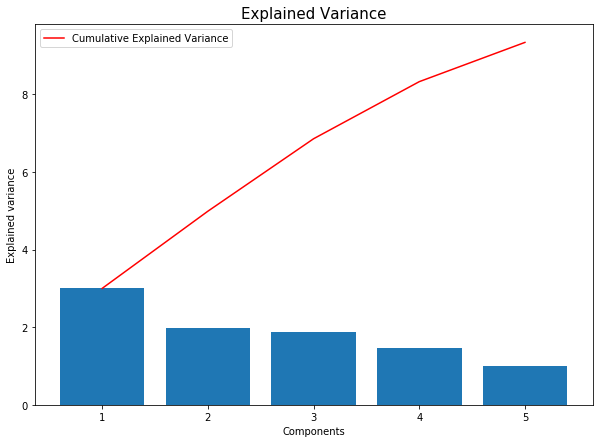

In [1005]:
plt.subplots(figsize=(10,7))
plt.title('Explained Variance', fontsize=15)
plt.bar(range(1,len(pcamodel.explained_variance_ )+1),pcamodel.explained_variance_ )
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(pcamodel.explained_variance_ )+1),
         np.cumsum(pcamodel.explained_variance_),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left')
plt.savefig('visuals/user_overview/pca_plots/explained_variance.png', format='png')
plt.show()

 Plot explained_variance_ratio_

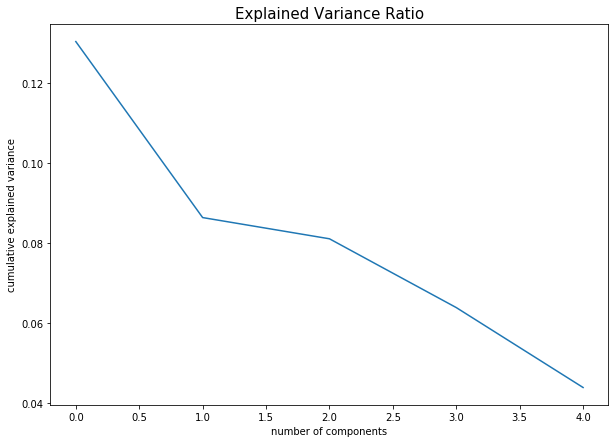

In [1006]:
plt.subplots(figsize=(10,7))
plt.title('Explained Variance Ratio', fontsize=15)
plt.plot(pcamodel.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.savefig('visuals/user_overview/pca_plots/explained_variance_ratio.png', format='png')
plt.show()

#PCA1 is at 0 in xscale

> Scree plot

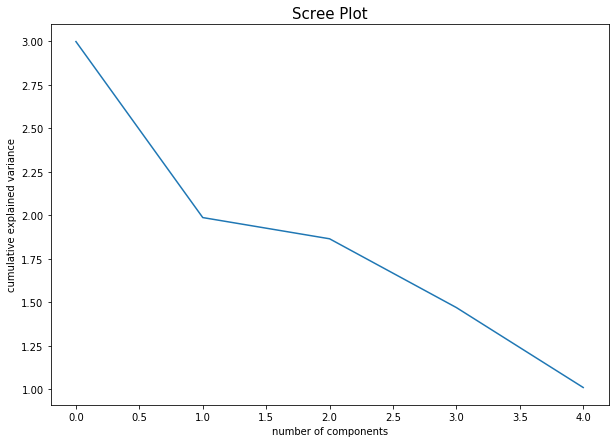

In [1007]:
plt.subplots(figsize=(10,7))
plt.title('Scree Plot', fontsize=15)
plt.plot(pcamodel.explained_variance_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.savefig('visuals/user_overview/pca_plots/scree_plot.png', format='png')
plt.show()

It can be seen from plots that, PCA-1 explains most of the variance than subsequent components. 

In other words, most of the features are explained and encompassed by PCA1

> Scatter plot of PCA1 and PCA2

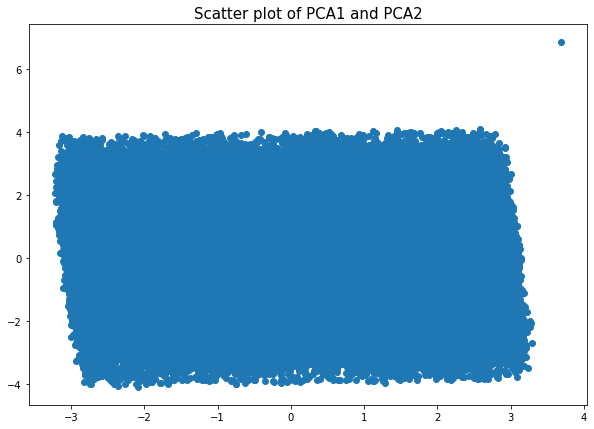

In [1008]:
plt.subplots(figsize=(10,7))
plt.scatter(pca[:, 0], pca[:, 1])
plt.title('Scatter plot of PCA1 and PCA2', fontsize=15)
plt.savefig('visuals/user_overview/pca_plots/scatter_pca1&2.png', format='png')
plt.show()

Effect of variables on each components

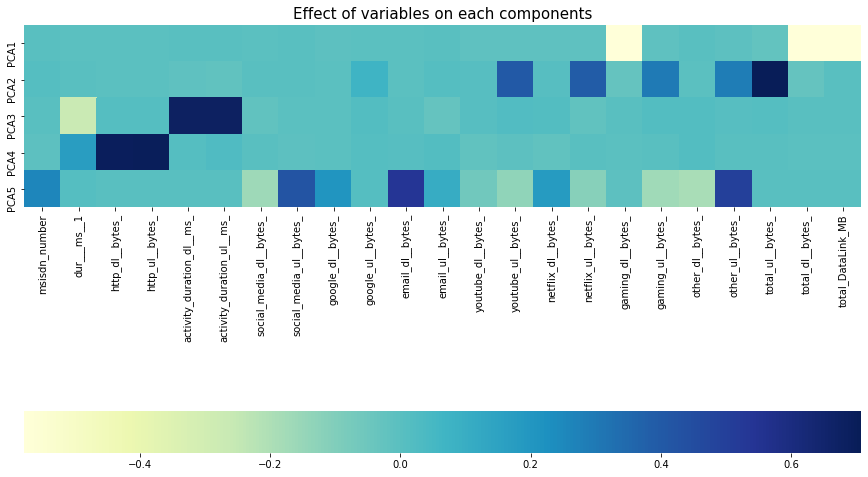

In [1009]:
plt.subplots(figsize=(15, 25))
plt.title('Effect of variables on each components', fontsize=15)
ax = sns.heatmap(pcamodel.components_,
                 cmap='YlGnBu', 
                 yticklabels=[ "PCA"+str(x) for x in range(1,pcamodel.n_components_+1)],
                 xticklabels=list(pca_data.columns),
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.savefig('visuals/user_overview/pca_plots/pca_variable_effects.png', format='png')
plt.show()

> From the above PCA 1 & 2 have the most effect on our variables

##### PCA Biplot

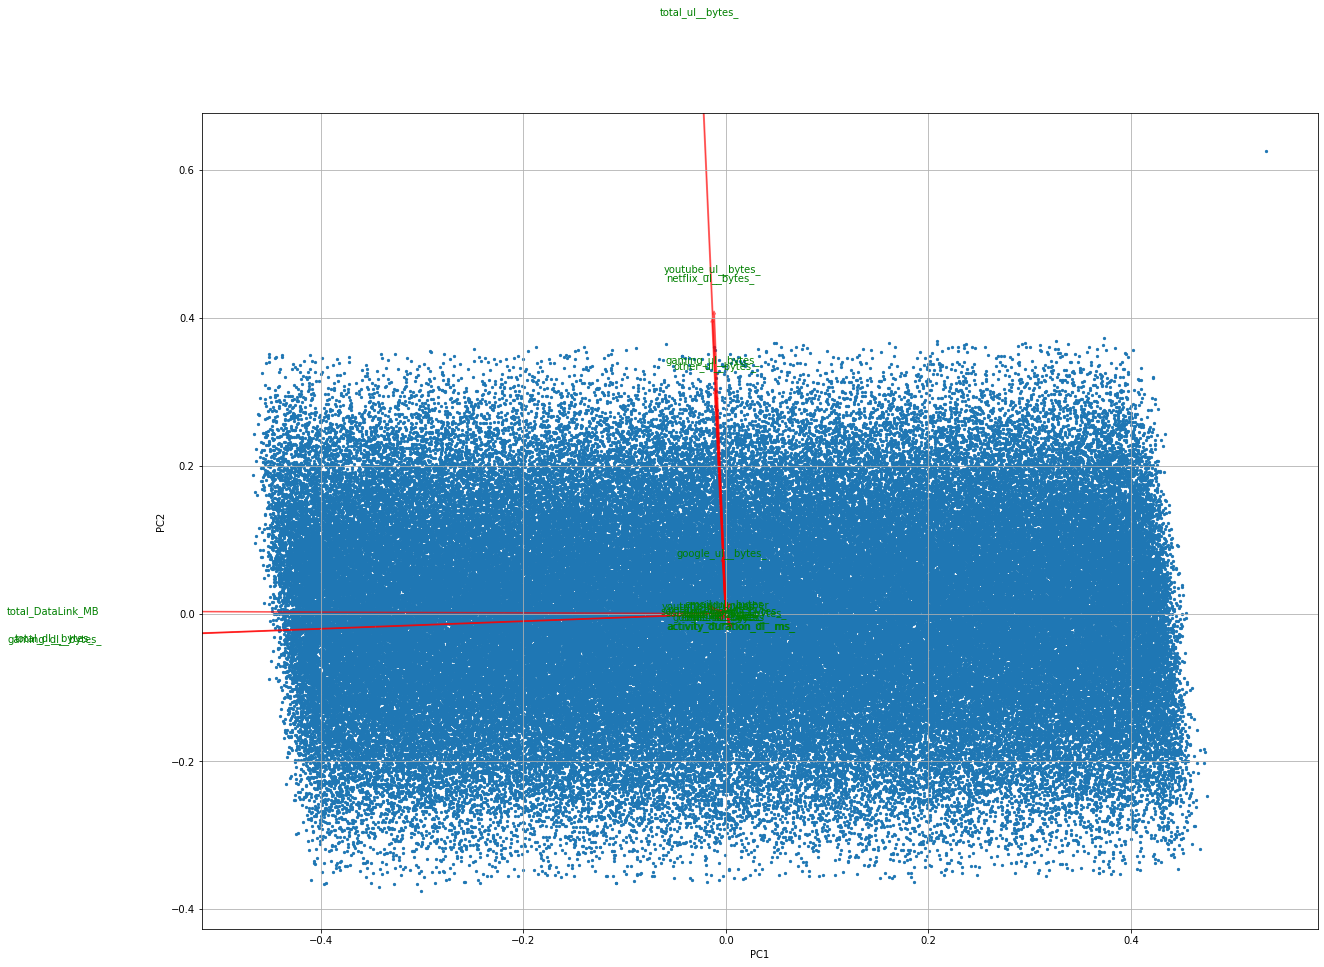

In [1010]:
def biplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.subplots(figsize=(20,15))
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

biplot(pca[:,0:2],np.transpose(pcamodel.components_[0:2, :]),list(pca_data.columns))
plt.show()

In [1011]:
print('end')

end


<a href='#top'>Go to top</a></li>